Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Loading the Flights Data

In [2]:
# Reading the Flights CSV file
flights_df = pd.read_csv('Flights.csv', low_memory=False)

# Displaying the first 5 rows of flights_df
print(flights_df.head())

      FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0  2019-03-02         WN   N955WN              4591              14635    RSW   
1  2019-03-02         WN   N8686A              3231              14635    RSW   
2  2019-03-02         WN   N201LV              3383              14635    RSW   
3  2019-03-02         WN   N413WN              5498              14635    RSW   
4  2019-03-02         WN   N7832A              6933              14635    RSW   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  \
0   Fort Myers, FL            11042         CLE  Cleveland, OH       -8.0   
1   Fort Myers, FL            11066         CMH   Columbus, OH        1.0   
2   Fort Myers, FL            11066         CMH   Columbus, OH        0.0   
3   Fort Myers, FL            11066         CMH   Columbus, OH       11.0   
4   Fort Myers, FL            11259         DAL     Dallas, TX        0.0   

   ARR_DELAY  CANCELLED AIR_TIME DISTANCE  OCCUPAN

In [3]:
# Printing the shape of flights_df
print(flights_df.shape)

(1915886, 16)


In [4]:
# Printing the data types of all the columns in flights_df
print(flights_df.dtypes)

FL_DATE               object
OP_CARRIER            object
TAIL_NUM              object
OP_CARRIER_FL_NUM     object
ORIGIN_AIRPORT_ID      int64
ORIGIN                object
ORIGIN_CITY_NAME      object
DEST_AIRPORT_ID        int64
DESTINATION           object
DEST_CITY_NAME        object
DEP_DELAY            float64
ARR_DELAY            float64
CANCELLED            float64
AIR_TIME              object
DISTANCE              object
OCCUPANCY_RATE       float64
dtype: object


Handling Missing Values

In the process of handling missing values, we took the following steps:

1. Dropped the tail_num Column: The tail_num column was removed from the dataset due to its significant number of missing values.
Imputed Missing Values Using MedianG. We grouped the data by relevant components to ensure accurate imputation.
3. The median value within each group was used to fill in the missing values across various columns.
4. This method was consistently applied to all columns with missing values, ensuring a more precise and reliable dataset.

In [5]:
# Function for counting null values in each column
def null_values(df):
    missing_values = df.isnull().sum()
    print("Missing values in each column:")
    print(missing_values)


In [6]:
# Displaying null values
null_values(flights_df)

Missing values in each column:
FL_DATE                  0
OP_CARRIER               0
TAIL_NUM             12156
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
DEST_AIRPORT_ID          0
DESTINATION              0
DEST_CITY_NAME           0
DEP_DELAY            50351
ARR_DELAY            55991
CANCELLED                0
AIR_TIME             56551
DISTANCE               630
OCCUPANCY_RATE         310
dtype: int64


In [7]:
# Removing the TAIL_NUM column from flights_df
flights_df = flights_df.drop(columns=['TAIL_NUM'])

# Verifying if the column is removed
print(flights_df.head())

      FL_DATE OP_CARRIER OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0  2019-03-02         WN              4591              14635    RSW   
1  2019-03-02         WN              3231              14635    RSW   
2  2019-03-02         WN              3383              14635    RSW   
3  2019-03-02         WN              5498              14635    RSW   
4  2019-03-02         WN              6933              14635    RSW   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  \
0   Fort Myers, FL            11042         CLE  Cleveland, OH       -8.0   
1   Fort Myers, FL            11066         CMH   Columbus, OH        1.0   
2   Fort Myers, FL            11066         CMH   Columbus, OH        0.0   
3   Fort Myers, FL            11066         CMH   Columbus, OH       11.0   
4   Fort Myers, FL            11259         DAL     Dallas, TX        0.0   

   ARR_DELAY  CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE  
0       -6.0        0.0    143.0   1025.0   

Handling Dates

In [8]:
# Printing unique dates
unique_dates = flights_df['FL_DATE'].unique()
print(unique_dates)

['2019-03-02' '2019-03-03' '2019-03-09' '2019-03-10' '2019-03-24'
 '2019-03-28' '2019-03-29' '2019-03-30' '2019-03-20' '2019-03-25'
 '2019-03-26' '2019-03-31' '2019-03-13' '2019-03-14' '2019-03-12'
 '2019-03-11' '2019-03-15' '2019-03-16' '2019-03-17' '2019-03-18'
 '2019-03-19' '2019-03-21' '2019-03-22' '2019-03-23' '2019-03-27'
 '2019-03-01' '2019-03-04' '2019-03-05' '2019-03-06' '2019-03-07'
 '2019-03-08' '2019-02-17' '2019-02-18' '2019-02-19' '2019-02-20'
 '2019-02-21' '2019-02-22' '2019-02-23' '2019-02-24' '2019-02-25'
 '2019-02-26' '2019-02-27' '2019-02-28' '2019-02-01' '2019-02-02'
 '2019-02-03' '2019-02-04' '2019-02-05' '2019-02-06' '2019-02-07'
 '2019-02-08' '2019-02-09' '2019-02-10' '2019-02-11' '2019-02-12'
 '2019-02-13' '2019-02-14' '2019-02-15' '2019-02-16' '2019-01-21'
 '2019-01-24' '2019-01-25' '2019-01-26' '2019-01-27' '2019-01-28'
 '2019-01-31' '2019-01-01' '2019-01-02' '2019-01-03' '2019-01-04'
 '2019-01-05' '2019-01-06' '2019-01-07' '2019-01-08' '2019-01-09'
 '2019-01-

In [9]:
# Function to convert all the dates to %m/%d/%y format
def convert_date(unique_dates):
    try:
        return pd.to_datetime(unique_dates, format='%m/%d/%y')
    except ValueError:
        return unique_dates

In [10]:
# Applying conversion function to FL_DATE column
flights_df['FL_DATE'] = flights_df['FL_DATE'].apply(convert_date)

# Checking the FL_DATE column
print(flights_df['FL_DATE'].dtype)
print(flights_df['FL_DATE'])

object
0                   2019-03-02
1                   2019-03-02
2                   2019-03-02
3                   2019-03-02
4                   2019-03-02
                  ...         
1915881    2019-03-23 00:00:00
1915882    2019-03-24 00:00:00
1915883    2019-03-25 00:00:00
1915884    2019-03-26 00:00:00
1915885    2019-03-27 00:00:00
Name: FL_DATE, Length: 1915886, dtype: object


In [11]:
# Printing the unique values of FL_DATE column
unique_dates = flights_df['FL_DATE'].unique()
print(unique_dates)

['2019-03-02' '2019-03-03' '2019-03-09' '2019-03-10' '2019-03-24'
 '2019-03-28' '2019-03-29' '2019-03-30' '2019-03-20' '2019-03-25'
 '2019-03-26' '2019-03-31' '2019-03-13' '2019-03-14' '2019-03-12'
 '2019-03-11' '2019-03-15' '2019-03-16' '2019-03-17' '2019-03-18'
 '2019-03-19' '2019-03-21' '2019-03-22' '2019-03-23' '2019-03-27'
 '2019-03-01' '2019-03-04' '2019-03-05' '2019-03-06' '2019-03-07'
 '2019-03-08' '2019-02-17' '2019-02-18' '2019-02-19' '2019-02-20'
 '2019-02-21' '2019-02-22' '2019-02-23' '2019-02-24' '2019-02-25'
 '2019-02-26' '2019-02-27' '2019-02-28' '2019-02-01' '2019-02-02'
 '2019-02-03' '2019-02-04' '2019-02-05' '2019-02-06' '2019-02-07'
 '2019-02-08' '2019-02-09' '2019-02-10' '2019-02-11' '2019-02-12'
 '2019-02-13' '2019-02-14' '2019-02-15' '2019-02-16' '2019-01-21'
 '2019-01-24' '2019-01-25' '2019-01-26' '2019-01-27' '2019-01-28'
 '2019-01-31' '2019-01-01' '2019-01-02' '2019-01-03' '2019-01-04'
 '2019-01-05' '2019-01-06' '2019-01-07' '2019-01-08' '2019-01-09'
 '2019-01-

In [12]:
# Checking the dtype of FL_DATE column
print(flights_df['FL_DATE'].dtype)

object


In [13]:
# Formatting the FL_DATE
flights_df['FL_DATE'] = pd.to_datetime(flights_df['FL_DATE'], format='%Y-%m-%d')

In [14]:
# Checking the dtype of FL_DATE column
print(flights_df['FL_DATE'].dtype)

datetime64[ns]


In [15]:
# Removing duplicates 
flights_df = flights_df.drop_duplicates()

# Verifying the result
print(flights_df.head())

     FL_DATE OP_CARRIER OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0 2019-03-02         WN              4591              14635    RSW   
1 2019-03-02         WN              3231              14635    RSW   
2 2019-03-02         WN              3383              14635    RSW   
3 2019-03-02         WN              5498              14635    RSW   
4 2019-03-02         WN              6933              14635    RSW   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  \
0   Fort Myers, FL            11042         CLE  Cleveland, OH       -8.0   
1   Fort Myers, FL            11066         CMH   Columbus, OH        1.0   
2   Fort Myers, FL            11066         CMH   Columbus, OH        0.0   
3   Fort Myers, FL            11066         CMH   Columbus, OH       11.0   
4   Fort Myers, FL            11259         DAL     Dallas, TX        0.0   

   ARR_DELAY  CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE  
0       -6.0        0.0    143.0   1025.0         

In [16]:
# Checking for the null values
null_values(flights_df)

Missing values in each column:
FL_DATE                  0
OP_CARRIER               0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
DEST_AIRPORT_ID          0
DESTINATION              0
DEST_CITY_NAME           0
DEP_DELAY            50216
ARR_DELAY            55847
CANCELLED                0
AIR_TIME             55903
DISTANCE                63
OCCUPANCY_RATE          31
dtype: int64


In [17]:
# Function to convert values to numeric or handle errors
def convert_to_numeric(value):
    try:
        return float(value)  # Convert to float or int as needed
    except (ValueError, TypeError):
        return None  # Return None or any default value for non-convertible values

In [18]:
# Applying the function to 'AIR_TIME' column
flights_df['AIR_TIME'] = flights_df['AIR_TIME'].apply(convert_to_numeric)

In [19]:
# Applying the function to 'DISTANCE' column
flights_df['DISTANCE'] = flights_df['DISTANCE'].apply(convert_to_numeric)

Steps to handle the missing values for columns DEP_DELAY, ARR_DELAY, AIR_TIME, DISTANCE, OCCUPANCY_RATE:         

1. Grouped the data by relevant components to ensure accurate imputation. 
2. The median value within each group was used to fill in the missing values across various columns.
3. This method was consistently applied to all columns with missing values, ensuring a more precise and reliable dataset.

In [20]:
# Funtion to fill the missing values with the median based on the grouped components
def fill_missing_with_median(df, column, groupby_cols):
    df[column] = df.groupby(groupby_cols)[column].transform(lambda x: x.fillna(x.median()))
    return df


Handling Missing Values in DEP_DELAY:

To handle missing values in the DEP_DELAY column, I imputed the median delay based on various levels of grouping to preserve context and patterns. Here's a brief explanation:

Detailed Grouping: Calculates the median DEP_DELAY for each specific flight, capturing unique delay patterns.
Grouping Components: ['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID']

Moderate Grouping: Calculates the median DEP_DELAY for the same carrier and route, without differentiating between flight numbers.
Grouping Components: ['OP_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID']

General Grouping: Calculates the median DEP_DELAY based solely on the origin airport, capturing overall delay patterns from that airport.
Grouping Components: ['ORIGIN_AIRPORT_IDt.


Handling Missing Values in ARR_DELAY

To handle missing values in the ARR_DELAY column, I used a similar approach:

Detailed Grouping: Calculates the median ARR_DELAY for each specific flight, capturing unique arrival delay patterns.
Grouping Components: ['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID']
 
Moderate Grouping: Calculates the median ARR_DELAY for the same carrier and route, without differentiating between flight numbers.
Grouping Components: ['OP_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID']

General Grouping: Calculates the median ARR_DELAY based on the route from origin to destination, capturing overall arrival delay patterns.
Grouping Components: ['ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID']

Grouping Components: ['DEST_AIRPORT_ID'] : Calculates the median ARR_DELAY based solely on the destination airport, capturing overall delay patterns at the destination.

Handling Missing Values in AIR_TIME:

To handle missing values in the AIR_TIME column, I imputed the median air time using different groupings:

Detailed Grouping: Calculates the median AIR_TIME for each specific flight, capturing unique air time patterns.
Grouping Components: ['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID']

Moderate Grouping: Calculates the median AIR_TIME for the same carrier and route, without differentiating between flight numbers.
Grouping Components: ['OP_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID']

General Grouping: Calculates the median AIR_TIME based on the route from origin to destination, capturing overall air time patterns.
Grouping Components: ['ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID']

Grouping Components: ['DEST_AIRPORT_ID'] : Calculates the median AIR_TIME based solely on the destination airport, capturing overall air time patterns at the destination.

Handling Missing Values in DISTANCE:

To handle missing values in the DISTANCE column, I imputed the median distance using specific groupings:

Detailed Grouping: Calculates the median DISTANCE for each specific flight, capturing unique distance patterns.
Grouping Components: ['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID']

Moderate Grouping: Calculates the median DISTANCE based on the route from origin to destination, capturing overall distance patterns.
Grouping Components: ['ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID']

Handling Missing Values in OCCUPANCY_RATE:

To handle missing values in the OCCUPANCY_RATE column, I imputed the median occupancy rate using detailed groupings:

Detailed Grouping: Calculates the median OCCUPANCY_RATE for each specific flight, capturing unique occupancy patterns.
Grouping Components: ['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID']

In [21]:
# Defining the columns with missing values and the group by columns for each
columns_to_fill = {
    'DEP_DELAY': [
        ['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID'],
        ['OP_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID'],
        ['ORIGIN_AIRPORT_ID']
    ],
    'ARR_DELAY': [
        ['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID'],
        ['OP_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID'],
        ['ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID'],
        ['DEST_AIRPORT_ID']
    ],
    'AIR_TIME': [
        ['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID'],
        ['OP_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID'],
        ['ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID'],
        ['DEST_AIRPORT_ID']
    ],
    'DISTANCE': [
        ['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID'],
        ['ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID']
    ],
    'OCCUPANCY_RATE': [
        ['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID']
    ]
}

# Filling the missing values for each column
for column, groupby_cols_list in columns_to_fill.items():
    for groupby_cols in groupby_cols_list:
        flights_df = fill_missing_with_median(flights_df, column, groupby_cols)

# Verifying the missing values are filled
print(flights_df.isnull().sum())


FL_DATE              0
OP_CARRIER           0
OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
ORIGIN_CITY_NAME     0
DEST_AIRPORT_ID      0
DESTINATION          0
DEST_CITY_NAME       0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
AIR_TIME             0
DISTANCE             0
OCCUPANCY_RATE       0
dtype: int64


Handling Outliers in the Flights Dataset:

To ensure the integrity and reliability of our analysis, I applied a systematic approach to handle outliers in key columns of the dataset: DEP_DELAY, ARR_DELAY, and AIR_TIME. Here's a summary of how I managed these outliers:

Steps to Handle Outliers:

1.Calculating Outlier Thresholds:
For each route, I calculated the first quartile (Q1) and the third quartile (Q3) for the specified column.
I computed the Interquartile Range (IQR) as the difference between Q3 and Q1.
Using the IQR, I determined the outlier thresholds:
Lower threshold: Q1 - 1.5 * IQR
Upper threshold: Q3 + 1.5 * IQR

2.Identifying the Outliers:
I identified data points that fell below the lower threshold or above the upper threshold as outliers.

3.Capping the Outliers:

I capped the outliers to the nearest threshold value. For values below the lower threshold, I set them to the lower threshold. Similarly, for values above the upper threshold, I set them to the upper threshold.

4.Visualization:
To understand the effect of outlier handling, I visualized the data before and after outlier handling for the route with the highest number of outliers.

In [22]:
# Function to Identify the Outliers
def calculate_outlier_thresholds(df, column):
    Q1 = df.groupby(['ORIGIN', 'DESTINATION'])[column].quantile(0.25).reset_index().rename(columns={column: 'Q1'})
    Q3 = df.groupby(['ORIGIN', 'DESTINATION'])[column].quantile(0.75).reset_index().rename(columns={column: 'Q3'})
    IQR = Q3['Q3'] - Q1['Q1']

    Q1['outlier_threshold_low'] = Q1['Q1'] - 1.5 * IQR
    Q3['outlier_threshold_high'] = Q3['Q3'] + 1.5 * IQR

    df = df.merge(Q1[['ORIGIN', 'DESTINATION', 'outlier_threshold_low']], on=['ORIGIN', 'DESTINATION'])
    df = df.merge(Q3[['ORIGIN', 'DESTINATION', 'outlier_threshold_high']], on=['ORIGIN', 'DESTINATION'])

    df['OUTLIER'] = (df[column] > df['outlier_threshold_high']) | (df[column] < df['outlier_threshold_low'])
    return df

In [23]:
# Function for a box plot Before Outlier Handling
def plot_route_data(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(title)
    plt.xlabel(column)
    plt.show()

In [24]:
# Function for Capping the Outliers
def cap_outliers(df, column):
    df[column] = df.apply(lambda row: min(max(row[column], row['outlier_threshold_low']), row['outlier_threshold_high']) if row['OUTLIER'] else row[column], axis=1)
    return df

In [25]:
# Function to handle outliers for a specific column
def handle_outliers_for_column(df, column):
    # Calculating the outlier thresholds
    df_with_thresholds = calculate_outlier_thresholds(df, column)

    # Finding route with maximum outliers
    outlier_counts = df_with_thresholds.groupby(['ORIGIN', 'DESTINATION'])['OUTLIER'].sum().reset_index().rename(columns={'OUTLIER': 'outlier_count'})
    max_outliers_route = outlier_counts.nlargest(1, 'outlier_count').iloc[0]

    # Filtering data for the specific route
    route_data = df_with_thresholds[(df_with_thresholds['ORIGIN'] == max_outliers_route['ORIGIN']) & (df_with_thresholds['DESTINATION'] == max_outliers_route['DESTINATION'])]

    # Plotting before outlier handling
    plot_route_data(route_data, column, f'{column} Before Outlier Handling ({max_outliers_route["ORIGIN"]} to {max_outliers_route["DESTINATION"]})')

    # Capping outliers
    df_capped = cap_outliers(df_with_thresholds, column)

    # Plotting after outlier handling
    route_data_after = df_capped[(df_capped['ORIGIN'] == max_outliers_route['ORIGIN']) & (df_capped['DESTINATION'] == max_outliers_route['DESTINATION'])]
    plot_route_data(route_data_after, column, f'{column} After Outlier Handling ({max_outliers_route["ORIGIN"]} to {max_outliers_route["DESTINATION"]})')

    # Dropping unnecessary columns
    df_capped.drop(columns=['OUTLIER', 'outlier_threshold_low', 'outlier_threshold_high'], inplace=True)
    return df_capped


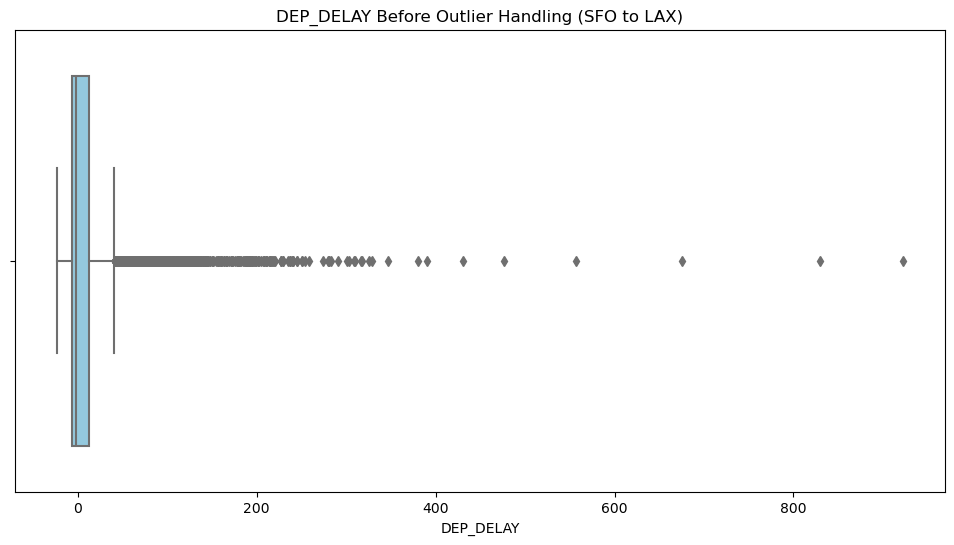

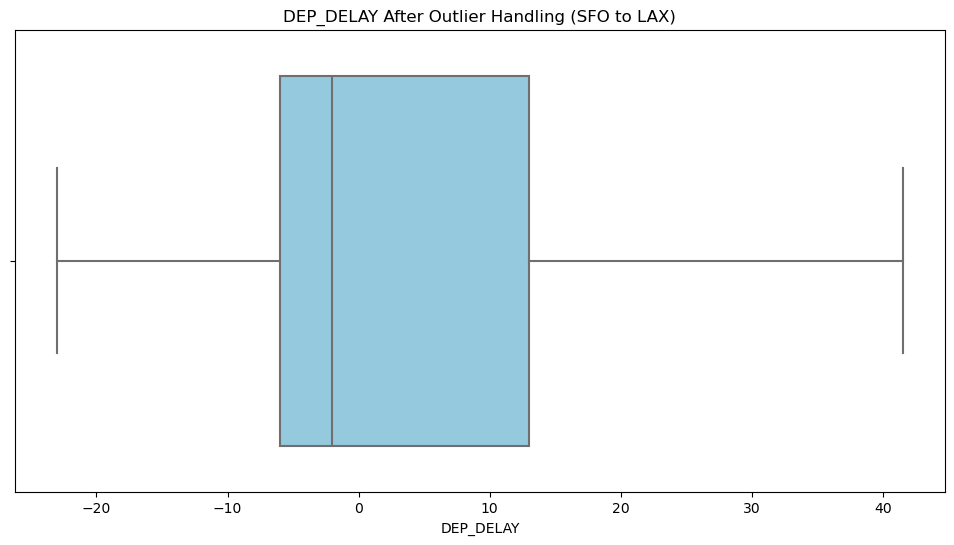

In [26]:
# Handling outliers for DEP_DELAY column and plotting the before after box plot for the route having maximum outliers
flights_df = handle_outliers_for_column(flights_df, 'DEP_DELAY')

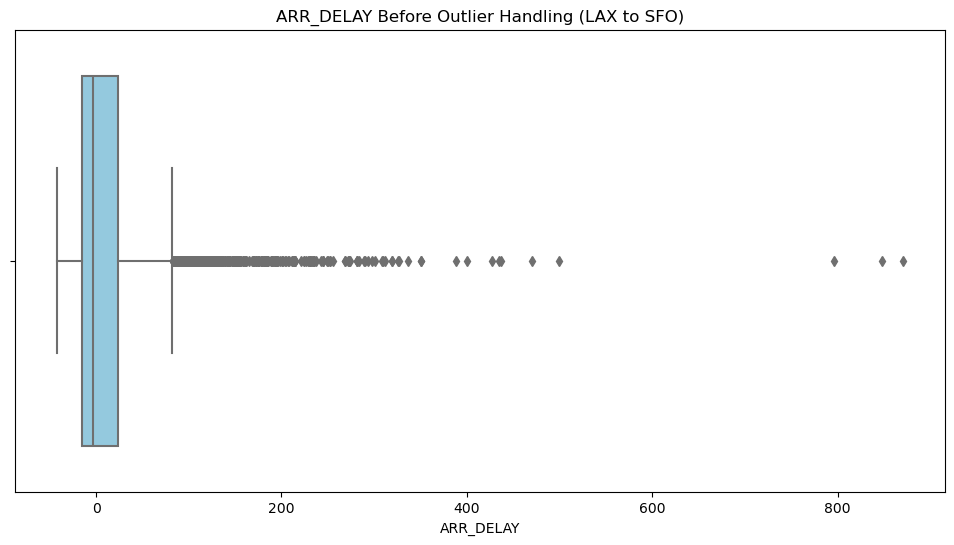

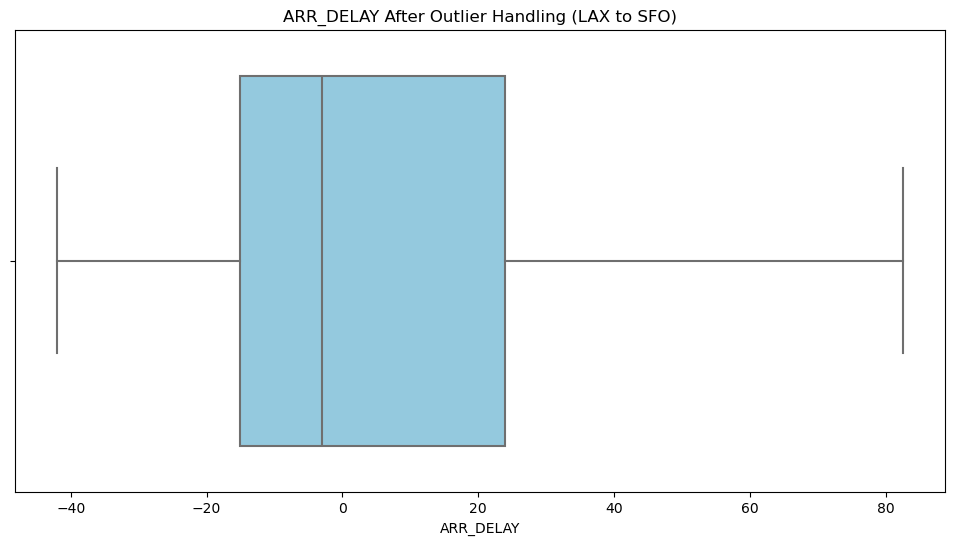

In [27]:
# Handling outliers for ARR_DELAY column and plotting the before after box plot for the route having maximum outliers
flights_df = handle_outliers_for_column(flights_df, 'ARR_DELAY')

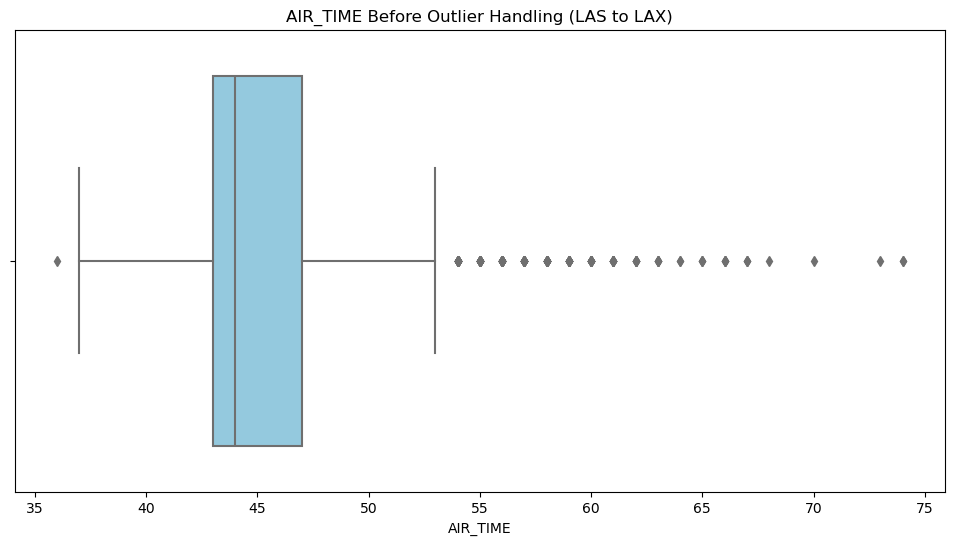

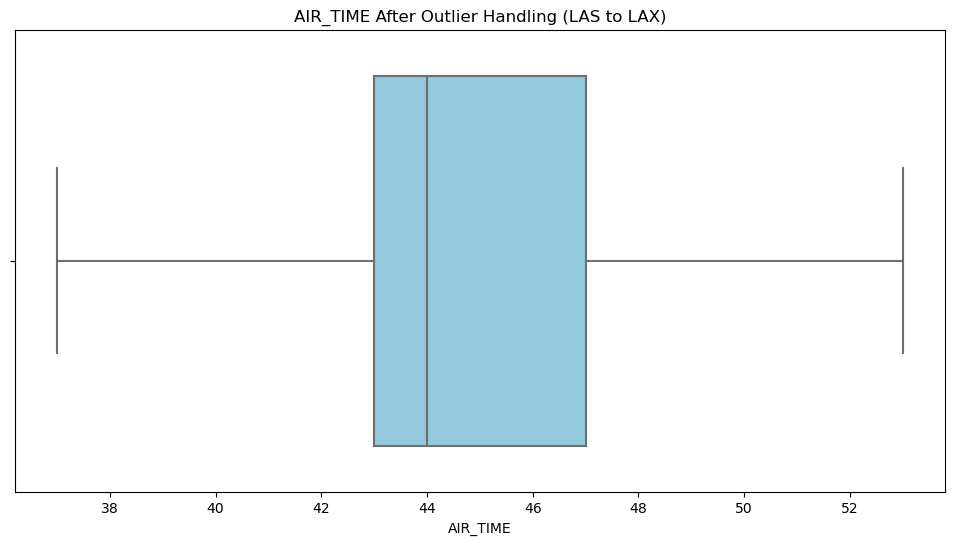

In [28]:
# Handling outliers for AIR_TIME column and plotting the before after box plot for the route having maximum outliers
flights_df = handle_outliers_for_column(flights_df, 'AIR_TIME')

Feature Engineering: Adding a Month Column

MetaData: Adding a month feature to the `flights_df` DataFrame based on the `FL_DATE` column.

In [29]:
# Creating a dictionary mapping month numbers to abbreviated month names
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Adding a new column 'Month' to the DataFrame
flights_df['Month'] = flights_df['FL_DATE'].dt.month.map(month_names)

# Printing flights_df
print(flights_df.head())

     FL_DATE OP_CARRIER OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0 2019-03-02         WN              4591              14635    RSW   
1 2019-03-09         WN              3016              14635    RSW   
2 2019-03-24         UA              2350              14635    RSW   
3 2019-03-11         UA              2350              14635    RSW   
4 2019-03-10         UA              2350              14635    RSW   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  \
0   Fort Myers, FL            11042         CLE  Cleveland, OH       -8.0   
1   Fort Myers, FL            11042         CLE  Cleveland, OH       -7.0   
2   Fort Myers, FL            11042         CLE  Cleveland, OH      -16.0   
3   Fort Myers, FL            11042         CLE  Cleveland, OH       -1.0   
4   Fort Myers, FL            11042         CLE  Cleveland, OH       -6.0   

   ARR_DELAY  CANCELLED  AIR_TIME  DISTANCE  OCCUPANCY_RATE Month  
0       -6.0        0.0     143.0    1025.

Feature Engineering: Adding a Weekday Column

MetaData: Adding an abbreviated weekday name feature to the `flights_df` DataFrame based on the `FL_DATE` column.

In [30]:
# Creating a dictionary mapping weekday numbers to weekday names
weekday_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}

# Adding a new column 'Weekday' to the DataFrame
flights_df['Weekday'] = flights_df['FL_DATE'].dt.weekday.map(weekday_names)

# Printing flights_df
print(flights_df.head())

     FL_DATE OP_CARRIER OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0 2019-03-02         WN              4591              14635    RSW   
1 2019-03-09         WN              3016              14635    RSW   
2 2019-03-24         UA              2350              14635    RSW   
3 2019-03-11         UA              2350              14635    RSW   
4 2019-03-10         UA              2350              14635    RSW   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  \
0   Fort Myers, FL            11042         CLE  Cleveland, OH       -8.0   
1   Fort Myers, FL            11042         CLE  Cleveland, OH       -7.0   
2   Fort Myers, FL            11042         CLE  Cleveland, OH      -16.0   
3   Fort Myers, FL            11042         CLE  Cleveland, OH       -1.0   
4   Fort Myers, FL            11042         CLE  Cleveland, OH       -6.0   

   ARR_DELAY  CANCELLED  AIR_TIME  DISTANCE  OCCUPANCY_RATE Month   Weekday  
0       -6.0        0.0     143.

Feature Engineering: Adding a PassengerOccupancy Column

MetaData: Calculating the number of passengers based on the occupancy rate and the maximum flight capacity, then adding it as a new column passenger_occupancy to the flights_df DataFrame.

In [31]:
# Defining the maximum flight capacity
max_capacity = 200

# Calculating the number of passengers based on the occupancy rate
flights_df['passenger_occupancy'] = (flights_df['OCCUPANCY_RATE'] * max_capacity).round().astype(int)

# Printing flights_df
print(flights_df.head())

     FL_DATE OP_CARRIER OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0 2019-03-02         WN              4591              14635    RSW   
1 2019-03-09         WN              3016              14635    RSW   
2 2019-03-24         UA              2350              14635    RSW   
3 2019-03-11         UA              2350              14635    RSW   
4 2019-03-10         UA              2350              14635    RSW   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  \
0   Fort Myers, FL            11042         CLE  Cleveland, OH       -8.0   
1   Fort Myers, FL            11042         CLE  Cleveland, OH       -7.0   
2   Fort Myers, FL            11042         CLE  Cleveland, OH      -16.0   
3   Fort Myers, FL            11042         CLE  Cleveland, OH       -1.0   
4   Fort Myers, FL            11042         CLE  Cleveland, OH       -6.0   

   ARR_DELAY  CANCELLED  AIR_TIME  DISTANCE  OCCUPANCY_RATE Month   Weekday  \
0       -6.0        0.0     143

In [32]:
# Checking for NaN values in the entire DataFrame
nan_counts = flights_df.isnull().any()

# Printing columns with NaN values
print("Columns with NaN values:")
print(nan_counts)

Columns with NaN values:
FL_DATE                False
OP_CARRIER             False
OP_CARRIER_FL_NUM      False
ORIGIN_AIRPORT_ID      False
ORIGIN                 False
ORIGIN_CITY_NAME       False
DEST_AIRPORT_ID        False
DESTINATION            False
DEST_CITY_NAME         False
DEP_DELAY              False
ARR_DELAY              False
CANCELLED              False
AIR_TIME               False
DISTANCE               False
OCCUPANCY_RATE         False
Month                  False
Weekday                False
passenger_occupancy    False
dtype: bool


In [33]:
flights_df.dtypes

FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM              object
ORIGIN_AIRPORT_ID               int64
ORIGIN                         object
ORIGIN_CITY_NAME               object
DEST_AIRPORT_ID                 int64
DESTINATION                    object
DEST_CITY_NAME                 object
DEP_DELAY                     float64
ARR_DELAY                     float64
CANCELLED                     float64
AIR_TIME                      float64
DISTANCE                      float64
OCCUPANCY_RATE                float64
Month                          object
Weekday                        object
passenger_occupancy             int32
dtype: object

In [34]:
# Converting ORIGIN_AIRPORT_ID and DEST_AIRPORT_ID to object type
flights_df['ORIGIN_AIRPORT_ID'] = flights_df['ORIGIN_AIRPORT_ID'].astype(str)
flights_df['DEST_AIRPORT_ID'] = flights_df['DEST_AIRPORT_ID'].astype(str)

In [35]:
flights_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,Month,Weekday,passenger_occupancy
0,2019-03-02,WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97,Mar,Saturday,194
1,2019-03-09,WN,3016,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-7.0,-22.0,0.0,137.0,1025.0,0.63,Mar,Saturday,126
2,2019-03-24,UA,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-16.0,-9.0,0.0,129.0,1025.0,0.98,Mar,Sunday,196
3,2019-03-11,UA,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-1.0,8.0,0.0,138.0,1025.0,0.36,Mar,Monday,72
4,2019-03-10,UA,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-6.0,1.0,0.0,141.0,1025.0,0.45,Mar,Sunday,90


In [36]:
# Counting of unique values for categorical columns
print("\nUnique Values in Categorical Columns:")
categorical_columns = flights_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {flights_df[col].nunique()} unique values")


Unique Values in Categorical Columns:
OP_CARRIER: 26 unique values
OP_CARRIER_FL_NUM: 6935 unique values
ORIGIN_AIRPORT_ID: 361 unique values
ORIGIN: 361 unique values
ORIGIN_CITY_NAME: 355 unique values
DEST_AIRPORT_ID: 361 unique values
DESTINATION: 361 unique values
DEST_CITY_NAME: 355 unique values
Month: 3 unique values
Weekday: 7 unique values


In [37]:
# Distribution of numeric columns
numeric_columns = flights_df.select_dtypes(include=['float64', 'int64']).columns

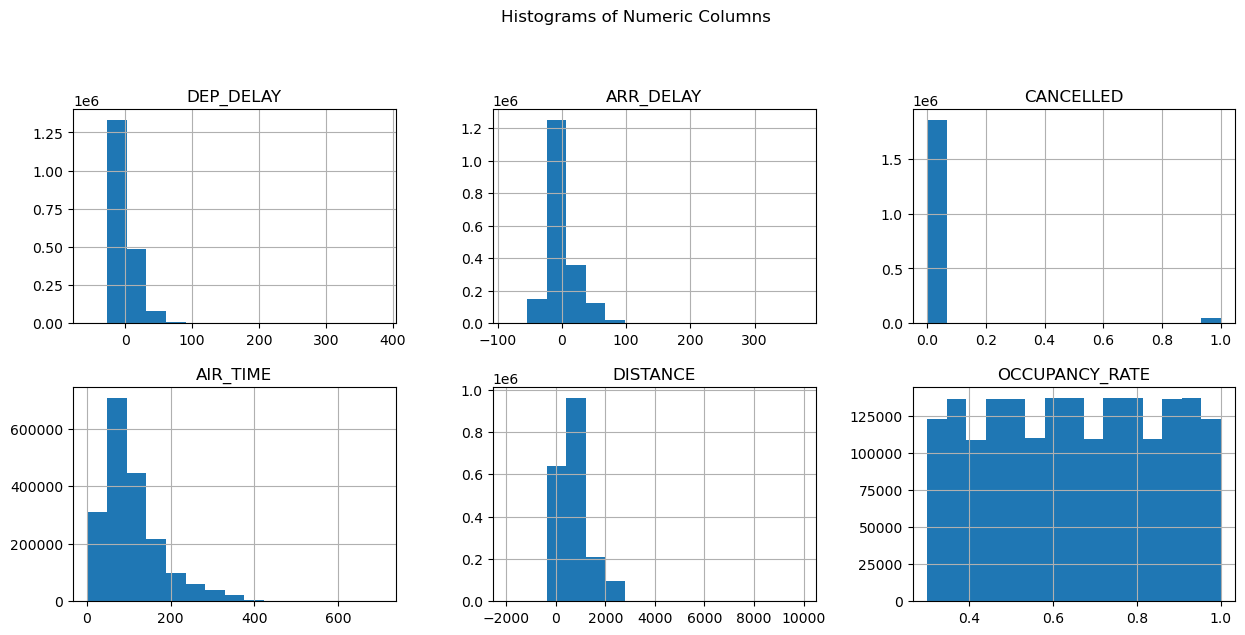

In [38]:
# Histograms
flights_df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

The histograms provide a visual summary of the distribution of each numerical column in the dataset. 

DEP_DELAY: The histogram shows the frequency of departure delays. Most flights have a departure delay close to 0. There are very few flights with very high departure delays. 

ARR_DELAY: The histogram shows the frequency of arrival delays. Similar to departure delays, most flights have arrival delays close to 0. A few flights have very high arrival delays. Also there are few flights which arrived early resulting in negative ARR_DELAY.

CANCELLED: The histogram shows the frequency of cancelled flights. Most of the values are at 0, indicating that the majority of flights are not cancelled. A small number of flights have a value of 1, indicating cancellation.

AIR_TIME: The histogram shows the frequency of air time in minutes. Most flights have air times between 0 and 200 minutes. There are fewer flights with higher air times (up to 600 minutes).

DISTANCE: The histogram shows the frequency of flight distances. Most flights have distances between 0 and 2000 miles. There are very few flights with higher distances (up to 10000 miles).

OCCUPANCY_RATE: The histogram shows the frequency of occupancy rates. The occupancy rates are fairly evenly distributed between 0.4 and 1.0.

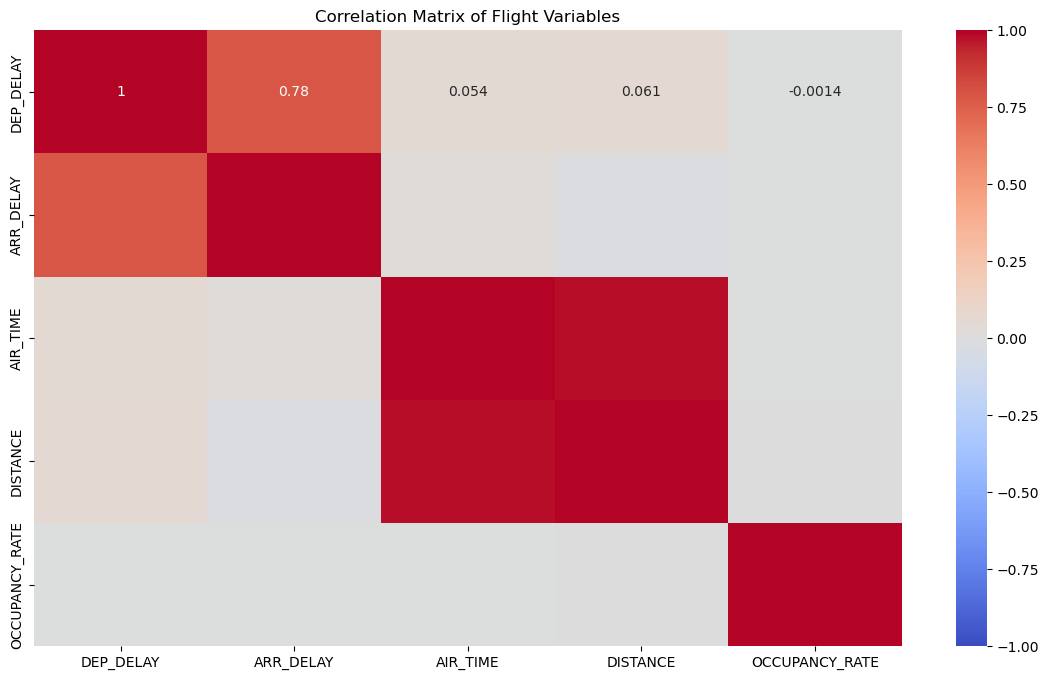

In [39]:
# Correlation Matrix
plt.figure(figsize=(14, 8))
correlation_matrix = flights_df[['DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Flight Variables')
plt.show()


The correlation matrix provides insights into the relationships between different flight variables. Here's a summary of the key takeaways:

Strong Positive Correlation Between DEP_DELAY and ARR_DELAY: Departure delay (DEP_DELAY) and arrival delay (ARR_DELAY) have a 0.78 correlation coefficient. Given that there is a strong positive correlation, it stands to reason that a delayed flight will probably have an arrival delay as well.

Weak Correlations with AIR_TIME and DISTANCE: The correlation coefficients between DEP_DELAY or ARR_DELAY with AIR_TIME and DISTANCE are very low (close to 0). This suggests that delays are not significantly influenced by the flight's air time or distance.

No Significant Correlation with OCCUPANCY_RATE: The occupancy rate (OCCUPANCY_RATE) shows no significant correlation with any other variable. This means that the percentage of seats occupied on a flight does not have a noticeable impact on delays, air time, or distance.

In [40]:
# Defining the list of categorical columns
categorical_columns = ['OP_CARRIER', 'ORIGIN', 'DESTINATION', 'Weekday']

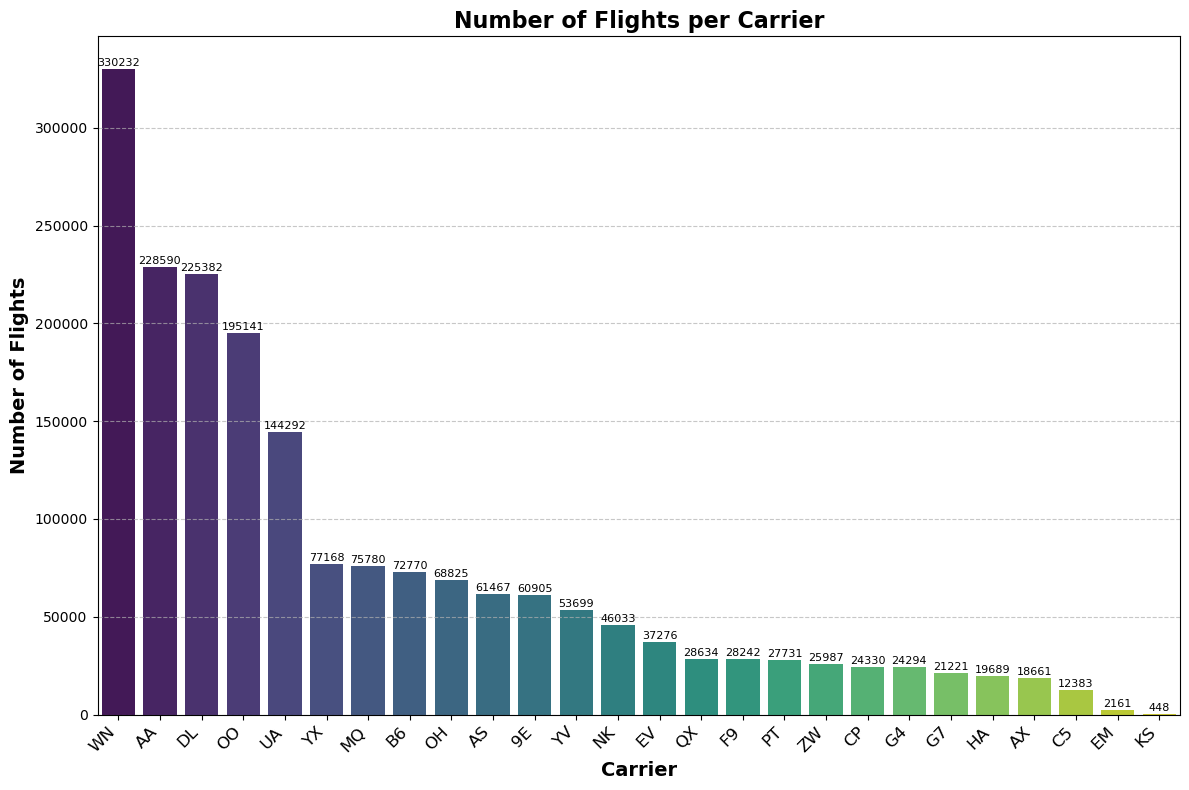

In [41]:
# Carrier with the highest number of flights
plt.figure(figsize=(12, 8))
carrier_counts = flights_df['OP_CARRIER'].value_counts()

# Ploting bar chart 
sns.barplot(x=carrier_counts.index, y=carrier_counts.values, palette='viridis')

# Adding titles and labels
plt.title('Number of Flights per Carrier', fontsize=16, fontweight='bold')
plt.xlabel('Carrier', fontsize=14, fontweight='bold')
plt.ylabel('Number of Flights', fontsize=14, fontweight='bold')

# Adding data labels
for i, value in enumerate(carrier_counts.values):
    plt.text(i, value + 500, str(value), ha='center', va='bottom', fontsize=8)


plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

This bar chart provides a clear visualization of the number of flights per carrier. Here are the insights:

Top Carriers by Flight Volume:
WN (Southwest Airlines) has the highest number of flights, with 330,232 flights. This indicates that Southwest Airlines is the most active carrier in this dataset.
AA (American Airlines) follows with 228,590 flights, and DL (Delta Airlines) is close behind with 225,382 flights.
The dominance of a few major carriers (WN, AA, DL) suggests they have a substantial market share and influence over the airline industry.

Mid-Range Carriers:
Carriers such as OO (SkyWest Airlines), UA (United Airlines), and YX (Republic Airways) have a significant number of flights, ranging from approximately 75,000 to 195,000.
MQ (Envoy Air), B6 (JetBlue Airways), and OH (PSA Airlines) also have notable flight counts between 60,000 and 77,000.

Less Active Carriers:
The lower end of the spectrum includes carriers like CP (Compass Airlines), G4 (Allegiant Air), G7 (GoJet Airlines), and HA (Hawaiian Airlines), with flight counts ranging from approximately 20,000 to 25,000.
AX (Trans States Airlines), C5 (CommutAir), EM (Empire Airlines), and KS (Peninsula Airways) have the fewest flights, with KS (Peninsula Airways) having only48 flights.



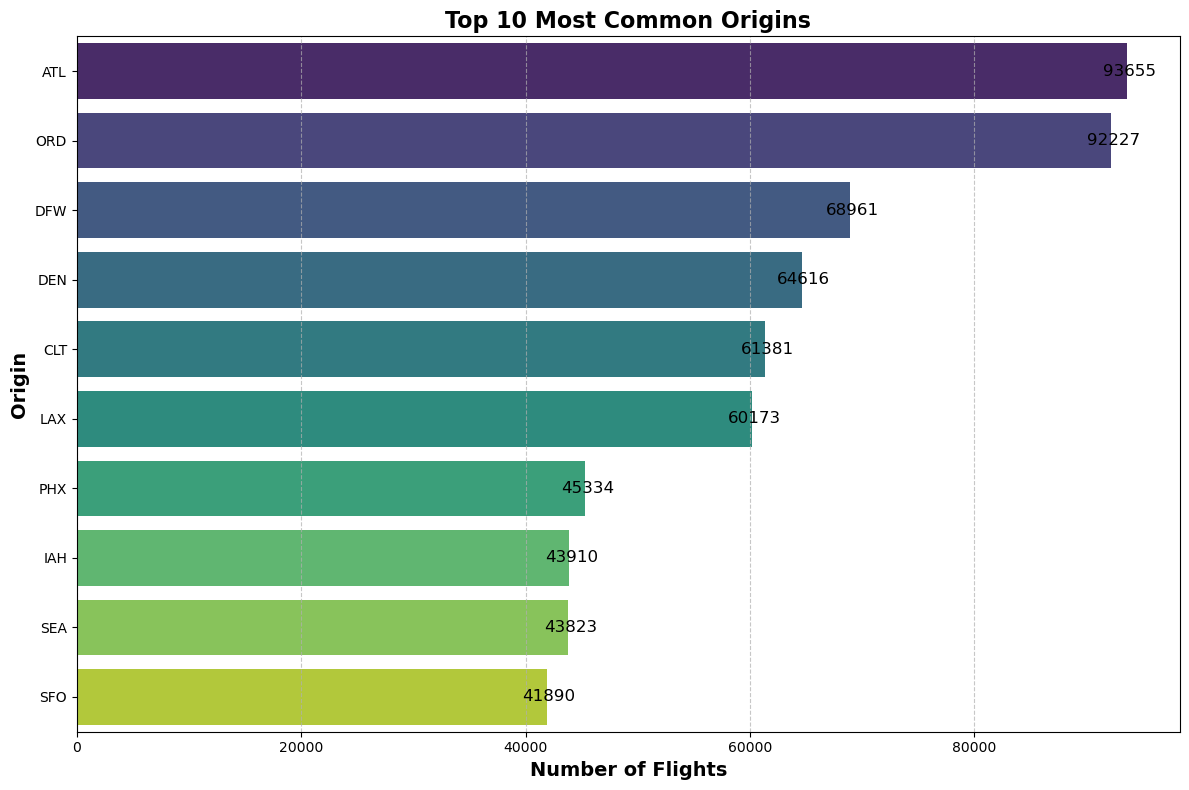

In [42]:
# Most common origins
plt.figure(figsize=(12, 8))
top_origins = flights_df['ORIGIN'].value_counts().head(10)

# Plotting horizontal bar chart
sns.barplot(y=top_origins.index, x=top_origins.values, palette='viridis')

# Adding titles and labels
plt.title('Top 10 Most Common Origins', fontsize=16, fontweight='bold')
plt.xlabel('Number of Flights', fontsize=14, fontweight='bold')
plt.ylabel('Origin', fontsize=14, fontweight='bold')

# Adding data labels
for i, value in enumerate(top_origins.values):
    plt.text(value + 200, i, str(value), ha='center', va='center', fontsize=12)


plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


This bar chart shows that Atlanta (ATL) and Chicago O'Hare (ORD) are the most common origin airports, indicating they are major hubs in the flight network. 
Other frequently used origin airports include Dallas/Fort Worth (DFW), Denver (DEN), and Charlotte (CLT).

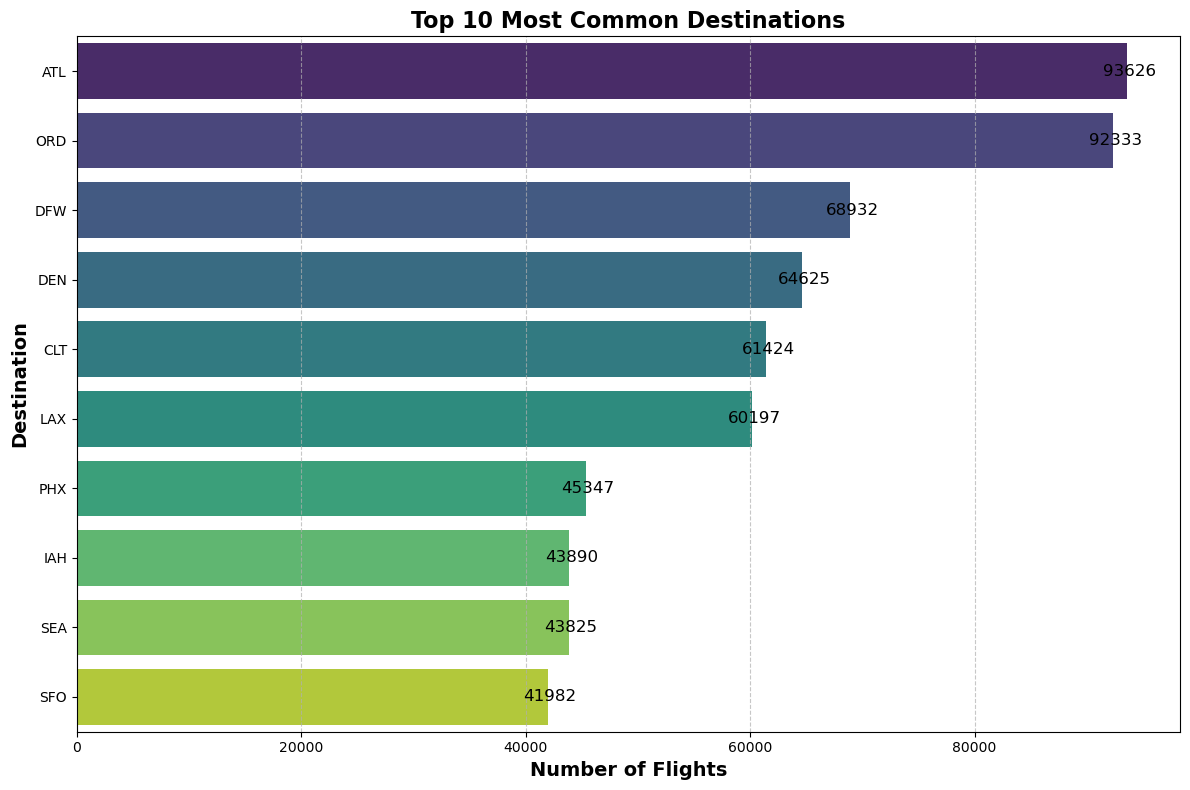

In [43]:
# Most common destinations
plt.figure(figsize=(12, 8))
top_destinations = flights_df['DESTINATION'].value_counts().head(10)

# Plotting horizontal bar chart
sns.barplot(y=top_destinations.index, x=top_destinations.values, palette='viridis')

# Adding titles and labels
plt.title('Top 10 Most Common Destinations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Flights', fontsize=14, fontweight='bold')
plt.ylabel('Destination', fontsize=14, fontweight='bold')

# Adding data labels
for i, value in enumerate(top_destinations.values):
    plt.text(value + 200, i, str(value), ha='center', va='center', fontsize=12)


plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

This bar chart shows that Atlanta (ATL) and Chicago O'Hare (ORD) are the most common destinations for flights, confirming their importance as major hubs in the US. The top destinations are similar to the top origins, with airports like Dallas/Fort Worth (DFW), Denver (DEN), and Charlotte (CLT) also appearing frequently. This pattern suggests that these airports play a central role in the US air travel network, handling a significant number of flights.

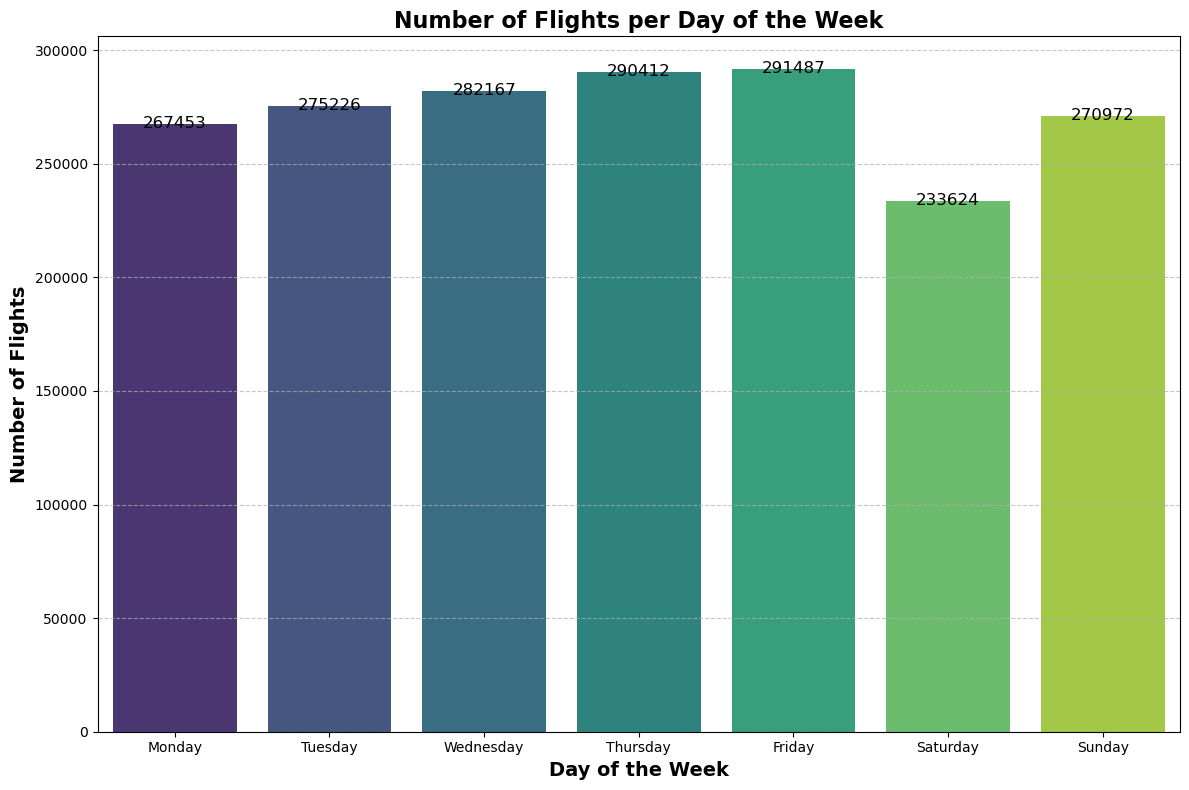

In [44]:
# Day of the week with the highest number of flights
plt.figure(figsize=(12, 8))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = flights_df['Weekday'].value_counts().reindex(weekday_order)

# Plotting bar chart
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='viridis')

# Adding titles and labels
plt.title('Number of Flights per Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14, fontweight='bold')
plt.ylabel('Number of Flights', fontsize=14, fontweight='bold')

# Adding data labels
for i, value in enumerate(weekday_counts.values):
    plt.text(i, value + 200, str(value), ha='center', va='center', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

This bar chart displays the number of flights per day of the week. It shows that Thursday and Friday have the highest number of flights, making them the busiest days for air travel. Conversely, Saturday has the fewest flights, indicating a slight dip in air travel activity. The rest of the days, including Monday, Tuesday, Wednesday, and Sunday, have fairly consistent flight volumes, highlighting a generally steady demand for flights throughout the week.

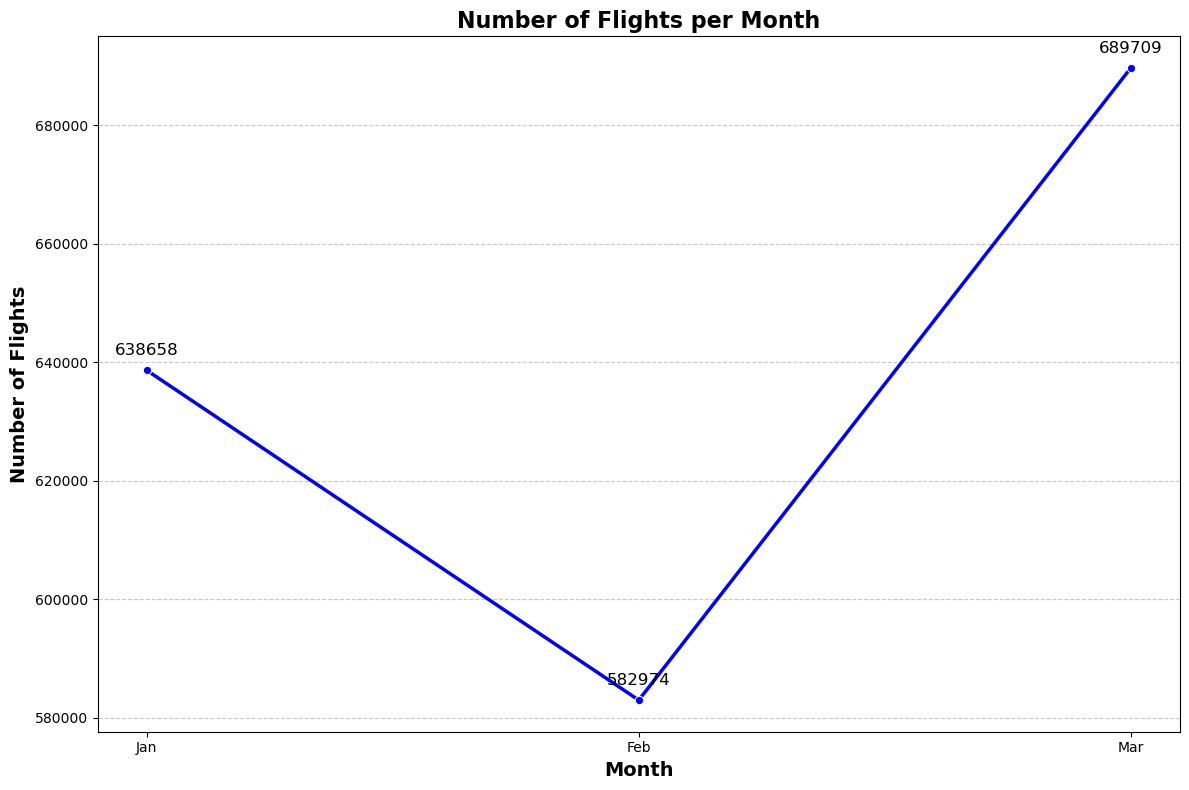

In [45]:
# Line plot showing number of flights per month
plt.figure(figsize=(12, 8))

# Order the months
month_order = ['Jan', 'Feb', 'Mar']

# Count the number of flights per month
monthly_counts = flights_df['Month'].value_counts().reindex(month_order)

# Plotting the line chart
sns.lineplot(x=month_order, y=monthly_counts.values, marker='o', color='blue', linewidth=2.5)

# Adding titles and labels
plt.title('Number of Flights per Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Number of Flights', fontsize=14, fontweight='bold')

# Adding data labels
for i, value in enumerate(monthly_counts.values):
    plt.text(i, value + 2000, str(value), ha='center', va='bottom', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

This line chart displays the number of flights per month. It demonstrates that, out of the three months, January and March have more flights than February, which has the fewest flights. This pattern suggests that flight activity decreased in February and increased significantly in March. According to the data, there appears to be a higher volume of air travel between January and March. This could be attributed to seasonal variations in demand and flight schedules, as well as other external variables.

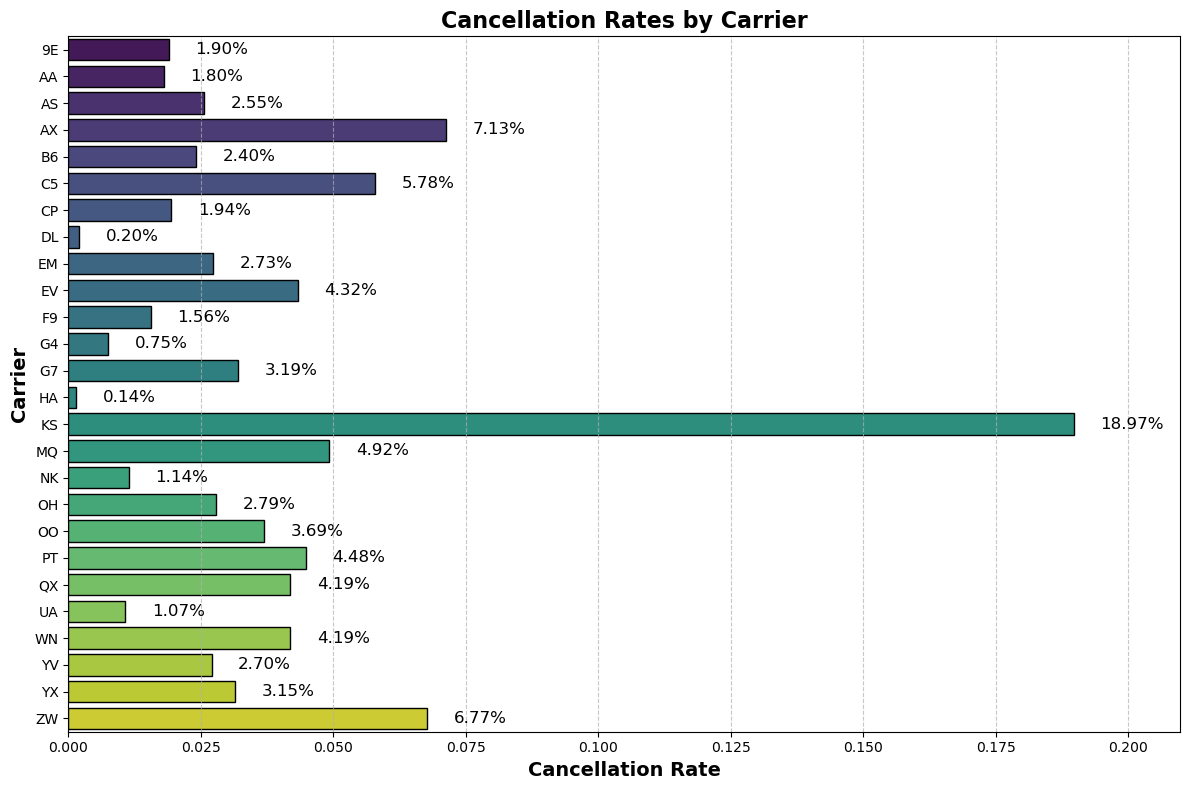

In [46]:
# Calculate cancellation rates
cancellation_rates = flights_df.groupby('OP_CARRIER')['CANCELLED'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=cancellation_rates, y='OP_CARRIER', x='CANCELLED', palette='viridis', edgecolor='black')

# Adding titles and labels
plt.title('Cancellation Rates by Carrier', fontsize=16, fontweight='bold')
plt.xlabel('Cancellation Rate', fontsize=14, fontweight='bold')
plt.ylabel('Carrier', fontsize=14, fontweight='bold')

# Adding data labels
for index, value in enumerate(cancellation_rates['CANCELLED']):
    plt.text(value + 0.005, index, f'{value:.2%}', va='center', fontsize=12)

plt.xlim(0, cancellation_rates['CANCELLED'].max() + 0.02)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The carrier "KS" has an exceptionally high cancellation rate compared to other carriers, indicating potential operational issues or other factors leading to cancellations. Other carriers have relatively low and more consistent cancellation rates.

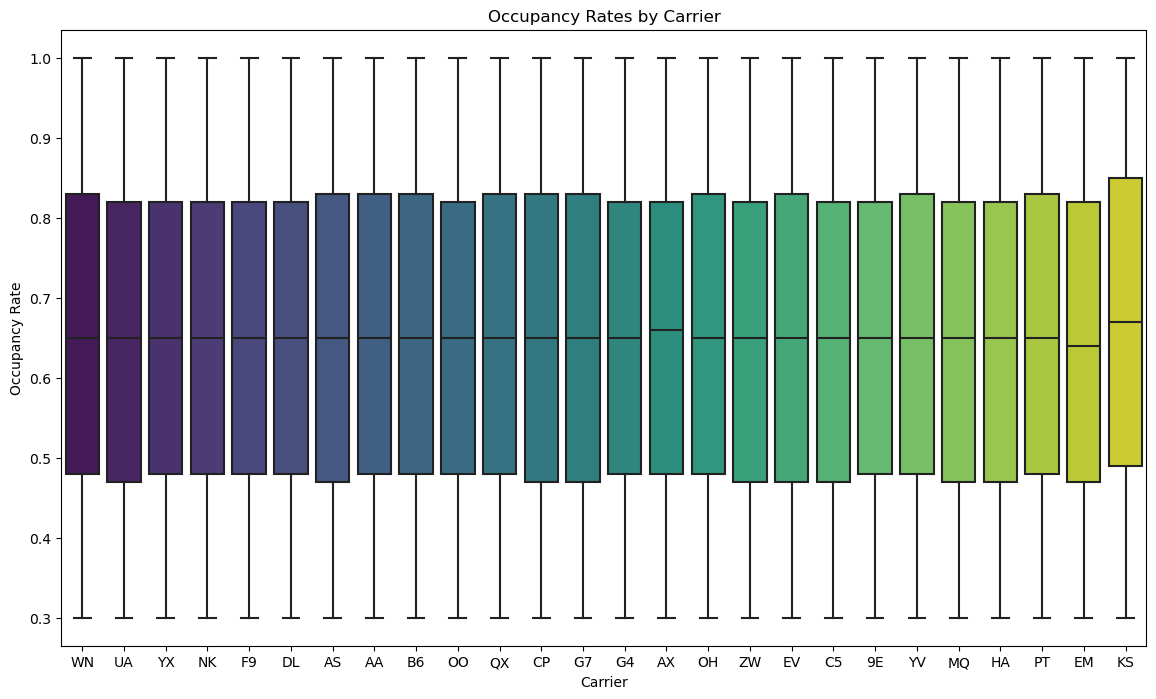

In [47]:
#Plotting boxplots
plt.figure(figsize=(14, 8))
sns.boxplot(data=flights_df, x='OP_CARRIER', y='OCCUPANCY_RATE', palette='viridis')

# Adding titles and labels
plt.title('Occupancy Rates by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Occupancy Rate')
plt.show()

The box plot displays the percentage of full flights for each carrier. Here are the key points:

Consistency Among airlines: Flights are often fairly full, with the majority of airlines having occupancy rates between 70% and 80%.
Range of Occupancy Carriers: Depending on the carriers and particular flight circumstances, flights can be 30% full or 100% full.
Median Values: The median occupancy rate for carriers such as WN, UA, and YX is approximately 75%. Some are marginally higher, closer to 80%, like KS and PT.
Lower Quartile Values: About 25% of flights for the majority of carriers have occupancy rates of 60% or less.
Upper Quartile Values: For most carriers, 25% of flights are 90% full or above.

In [48]:
# Calculate average departure and arrival delays per carrier
avg_delays_per_carrier = flights_df.groupby('OP_CARRIER')[['DEP_DELAY', 'ARR_DELAY']].mean().reset_index()
avg_delays_per_carrier = avg_delays_per_carrier.sort_values(by='DEP_DELAY', ascending=False)

print(avg_delays_per_carrier)


   OP_CARRIER  DEP_DELAY  ARR_DELAY
14         KS  19.662946  18.419364
5          C5  15.054106  15.991470
4          B6   5.536385   2.324911
3          AX   5.110327   6.667743
22         WN   4.969895  -1.373623
10         F9   3.062814  -1.036937
21         UA   3.012718   0.340410
1          AA   2.615271  -0.008688
18         OO   2.224930   0.669651
9          EV   2.050897   3.223116
12         G7   2.025844  -0.285705
6          CP   1.851135   0.488415
20         QX   1.724501   2.586348
15         MQ   1.363965   1.820424
17         OH   1.159989  -1.715149
7          DL   1.080806  -5.374527
11         G4   0.971742  -0.129235
16         NK   0.934307  -3.277776
23         YV   0.610805   0.966273
24         YX   0.558075  -0.717064
0          9E   0.215358  -4.108067
2          AS   0.009806  -0.823020
13         HA  -0.151677   0.357458
25         ZW  -1.906165  -2.824956
8          EM  -1.915201  -0.851920
19         PT  -2.978192  -3.811484


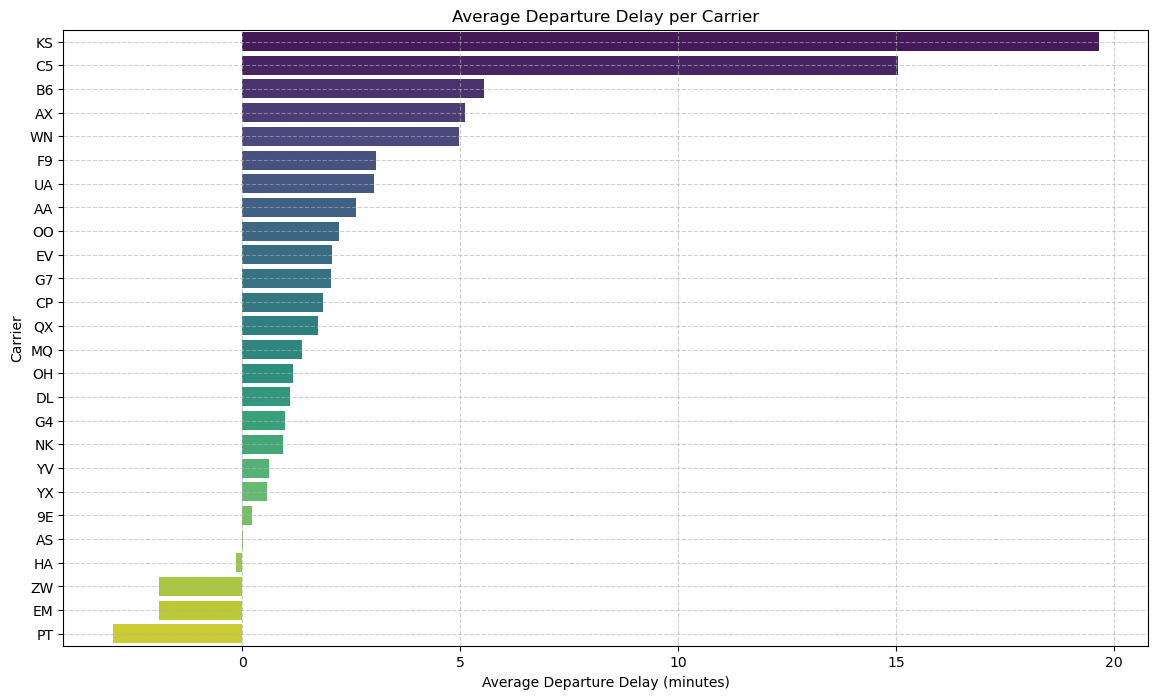

In [49]:
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_delays_per_carrier, x='DEP_DELAY', y='OP_CARRIER', palette='viridis')

# Adding titles and labels
plt.title('Average Departure Delay per Carrier')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Carrier')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


The bar chart shows the average departure delay for each airline. Here’s a quick summary of the key points:

Significant Delays for KS and C5: KS stands out with the highest average departure delay, much higher than the others, followed by C5.
Moderate Delays: Airlines like B6, AX, and WN also have noticeable delays, but not as severe as KS and C5.
Average Delays: Carriers such as UA, AA, and OO fall in the middle, with moderate delays.
Minimal Delays: Airlines like PT, EM, ZW, and HA have the shortest delays, indicating they are quite punctual.

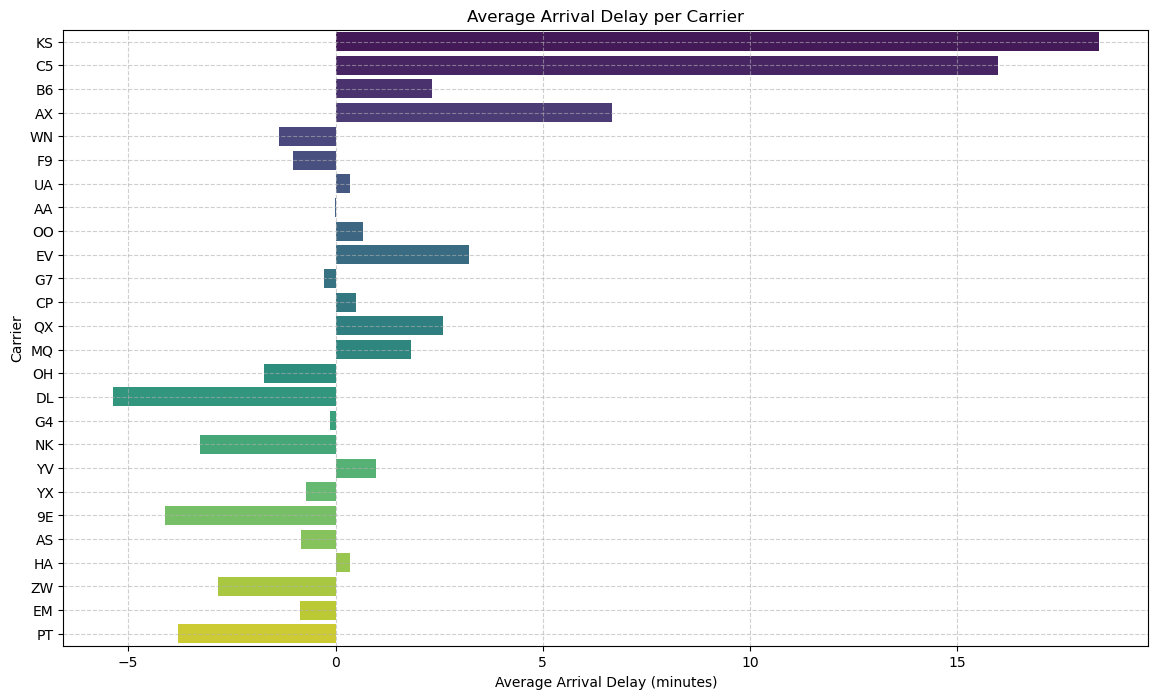

In [50]:
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_delays_per_carrier, x='ARR_DELAY', y='OP_CARRIER', palette='viridis')
# Adding titles and labels
plt.title('Average Arrival Delay per Carrier')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Carrier')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


The bar chart illustrates the average arrival delay for each airline. Here’s a quick summary of the key points:

High Delays for KS and C5: KS has the highest average arrival delay, closely followed by C5, indicating significant issues with timely arrivals for these carriers.
Moderate Delays: B6, AX, and WN also experience noticeable arrival delays but are not as extreme as KS and C5.
Minimal Delays and Early Arrivals: Some airlines, such as PT, EM, and ZW, show minimal delays, and in some cases, early arrivals, which suggests they are generally punctual.
Mixed Performance: The average arrival times of airlines such as DL, NK, and OH are close to zero, suggesting a balance between punctual and delayed arrials.


Metadata of flights_df:  

FL_DATE (datetime64[ns]): Flight Date (yyyy-mm-dd)

OP_CARRIER (object): Operating commercial carrier Flight code

OP_CARRIER_FL_NUM (object): Operating commercial carrier Flight number


ORIGIN_AIRPORT_ID (int64): Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. 

ORIGIN (object): Origin Airport, International Air Transport Association (IATA) Airport Code

ORIGIN_CITY_NAME (object): "Origin Airport, City Name		"

DEST_AIRPORT_ID (int64): Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.

DESTINATION (object): Destination Airport, Operating commercial carrier Flight code (IATA )Airport Code

DEST_CITY_NAME (object): Destination Airport, City Name

DEP_DELAY (float64): Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.

ARR_DELAY (float64): Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.

CANCELLED (float64): Cancelled Flight Indicator (1=Flight is cancelled).  Cancelled flights should be excluded

AIR_TIME (float64): Flight Time, in Minutes		"

DISTANCE (float64): Distance between Origin and Destination Airports in Miles

OCCUPANCY_RATE (float64): Occupancy rate of the flight

Month (object): The month of the flight.

Weekday (object): The day of the week of the flight.

passenger_occupancy (int32): The number of passengers based on the occupancy rate.

Load Tickets Dataset

In [51]:
# Loading the tickets dataset
tickets_df = pd.read_csv('Tickets.csv')

In [52]:
tickets_df.shape

(1167285, 12)

In [53]:
# Sampling the data
sample_size = 0.1  # 10% of the data
tickets_df = tickets_df.sample(frac=sample_size, random_state=42)

In [54]:
tickets_df.shape

(116728, 12)

In [55]:
# Considering only roundtrips in the tickets_df
tickets_df = tickets_df[tickets_df['ROUNDTRIP'] == 1]

In [56]:
tickets_df.shape

(70873, 12)

In [57]:
# Checking for the null values in tickets_df
null_values(tickets_df)

Missing values in each column:
ITIN_ID                0
YEAR                   0
QUARTER                0
ORIGIN                 0
ORIGIN_COUNTRY         0
ORIGIN_STATE_ABR       0
ORIGIN_STATE_NM        0
ROUNDTRIP              0
REPORTING_CARRIER      0
PASSENGERS           117
ITIN_FARE             61
DESTINATION            0
dtype: int64


In [58]:
# Printing the data types to verify the conversion
print(tickets_df.dtypes)

ITIN_ID                int64
YEAR                   int64
QUARTER                int64
ORIGIN                object
ORIGIN_COUNTRY        object
ORIGIN_STATE_ABR      object
ORIGIN_STATE_NM       object
ROUNDTRIP            float64
REPORTING_CARRIER     object
PASSENGERS           float64
ITIN_FARE             object
DESTINATION           object
dtype: object


Handling Outliers

Handling Outliers in PASSENGERS column:

I handled missing values in the PASSENGERS column of the tickets_df DataFrame using a stepwise median imputation approach. Here's how I did it:

Detailed Grouping: I calculated the median number of passengers for each combination of origin, destination, and reporting carrier. This captures the most specific context and patterns in the data. I then filled the missing values in the PASSENGERS column with these calculated medians
Grouping Criteria: ['ORIGIN', 'DESTINATION', 'REPORTING_CARRIER']
 .
Moderate Grouping: I calculated the median number of passengers for each origin and destination pair, ignoring the reporting carrier. This provides a broader context if the first level didn't cover some cases. Any remaining missing values in the PASSENGERS column were filled with these medians.
Grouping Criteria: ['ORIGIN', 'DESTINATION']

General Grouping: I calculated the median number of passengers for each origin airport, ignoring the destination and reporting carrier. This offers the most general context for filling missing values. Any remaining missing values in the PASSENGERS column were filled with these medians.
Grouping Criteria: ['ORIGIN']


In [59]:
# Calculate median for PASSENGERS based on ORIGIN, DESTINATION, and REPORTING_CARRIER
median_passengers = tickets_df.groupby(['ORIGIN', 'DESTINATION', 'REPORTING_CARRIER'])['PASSENGERS'].transform('median')

# Impute missing values in PASSENGERS column
tickets_df['PASSENGERS'] = tickets_df['PASSENGERS'].fillna(median_passengers)

In [60]:
null_values(tickets_df)

Missing values in each column:
ITIN_ID               0
YEAR                  0
QUARTER               0
ORIGIN                0
ORIGIN_COUNTRY        0
ORIGIN_STATE_ABR      0
ORIGIN_STATE_NM       0
ROUNDTRIP             0
REPORTING_CARRIER     0
PASSENGERS           28
ITIN_FARE            61
DESTINATION           0
dtype: int64


In [61]:
# Calculate median for PASSENGERS based on ORIGIN, DESTINATION, and REPORTING_CARRIER
median_passengers = tickets_df.groupby(['ORIGIN', 'DESTINATION'])['PASSENGERS'].transform('median')

# Imputing the missing values in PASSENGERS column
tickets_df['PASSENGERS'] = tickets_df['PASSENGERS'].fillna(median_passengers)

In [62]:
null_values(tickets_df)

Missing values in each column:
ITIN_ID               0
YEAR                  0
QUARTER               0
ORIGIN                0
ORIGIN_COUNTRY        0
ORIGIN_STATE_ABR      0
ORIGIN_STATE_NM       0
ROUNDTRIP             0
REPORTING_CARRIER     0
PASSENGERS           15
ITIN_FARE            61
DESTINATION           0
dtype: int64


In [63]:
# Calculating the median for PASSENGERS based on ORIGIN, DESTINATION, and REPORTING_CARRIER
median_passengers = tickets_df.groupby(['ORIGIN'])['PASSENGERS'].transform('median')

# Imputing the missing values in PASSENGERS column
tickets_df['PASSENGERS'] = tickets_df['PASSENGERS'].fillna(median_passengers)

In [64]:
null_values(tickets_df)

Missing values in each column:
ITIN_ID               0
YEAR                  0
QUARTER               0
ORIGIN                0
ORIGIN_COUNTRY        0
ORIGIN_STATE_ABR      0
ORIGIN_STATE_NM       0
ROUNDTRIP             0
REPORTING_CARRIER     0
PASSENGERS            0
ITIN_FARE            61
DESTINATION           0
dtype: int64


In [65]:
# Converting ITIN_FARE to numeric
tickets_df['ITIN_FARE'] = tickets_df['ITIN_FARE'].apply(convert_to_numeric)

Handling missing values in the ITIN_FARE column:

I handled missing values in the ITIN_FARE column of the tickets_df DataFrame using a stepwise median imputation approach. Here's how I did it:

Detailed Grouping: I calculated the median fare for each combination of origin, destination, and reporting carrier. This captures the most specific context and patterns in the data. I filled the missing values in the ITIN_FARE column with these calculated medians.
Grouping Criteria: ['ORIGIN', 'DESTINATION', 'REPORTING_CARRIER']

Moderate Grouping: I calculated the median fare for each destination, ignoring the origin and reporting carrier. This provides a broader context if the first level didn't cover some cases. Any remaining missing values in the ITIN_FARE column were filled with these medians.
Grouping Criteria: ['DESTINATION']


In [66]:
# Calculating median for ITIN_FARE based on ORIGIN, DESTINATION, and REPORTING_CARRIER
median_fare = tickets_df.groupby(['ORIGIN', 'DESTINATION', 'REPORTING_CARRIER'])['ITIN_FARE'].transform('median')

# Imputing missing values in ITIN_FARE column
tickets_df['ITIN_FARE'] = tickets_df['ITIN_FARE'].fillna(median_fare)

In [67]:
null_values(tickets_df)

Missing values in each column:
ITIN_ID               0
YEAR                  0
QUARTER               0
ORIGIN                0
ORIGIN_COUNTRY        0
ORIGIN_STATE_ABR      0
ORIGIN_STATE_NM       0
ROUNDTRIP             0
REPORTING_CARRIER     0
PASSENGERS            0
ITIN_FARE            35
DESTINATION           0
dtype: int64


In [68]:
# Calculating median for ITIN_FARE based on ORIGIN, DESTINATION, and REPORTING_CARRIER
median_fare = tickets_df.groupby(['DESTINATION'])['ITIN_FARE'].transform('median')

# Imputing missing values in ITIN_FARE column
tickets_df['ITIN_FARE'] = tickets_df['ITIN_FARE'].fillna(median_fare)

In [69]:
null_values(tickets_df)

Missing values in each column:
ITIN_ID              0
YEAR                 0
QUARTER              0
ORIGIN               0
ORIGIN_COUNTRY       0
ORIGIN_STATE_ABR     0
ORIGIN_STATE_NM      0
ROUNDTRIP            0
REPORTING_CARRIER    0
PASSENGERS           0
ITIN_FARE            0
DESTINATION          0
dtype: int64


In [70]:
tickets_df.head()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
915637,201914142309,2019,1,SEA,US,WA,Washington,1.0,UA,1.0,585.0,RSW
899485,201912332853,2019,1,SEA,US,WA,Washington,1.0,DL,1.0,731.0,SLC
742843,201912199184,2019,1,PBI,US,FL,Florida,1.0,DL,1.0,648.0,CAK
966795,201913394457,2019,1,SLC,US,UT,Utah,1.0,OO,2.0,196.0,TUL
882953,20191966543,2019,1,SAT,US,TX,Texas,1.0,AA,1.0,389.0,PHL


In [71]:
# Check for NaN values in the entire DataFrame
nan_counts = tickets_df.isnull().any()

# Print columns with NaN values
print("Columns with NaN values:")
print(nan_counts)

Columns with NaN values:
ITIN_ID              False
YEAR                 False
QUARTER              False
ORIGIN               False
ORIGIN_COUNTRY       False
ORIGIN_STATE_ABR     False
ORIGIN_STATE_NM      False
ROUNDTRIP            False
REPORTING_CARRIER    False
PASSENGERS           False
ITIN_FARE            False
DESTINATION          False
dtype: bool


In [72]:
# Identify duplicate rows
duplicate_rows = tickets_df[tickets_df.duplicated()]

# Drop duplicate rows
tickets_df.drop_duplicates(inplace=True)

Handling Outliers

I handled outliers in the ITIN_FARE column of the tickets_df DataFrame using the interquartile range (IQR) method. Here's a detailed explanation of how I did it:

1.Calculate Q1, Q3, and IQR:
Q1 and Q3 Calculation: I calculated the first quartile (Q1) and third quartile (Q3) for each route based on the combination of ORIGIN and DESTINATION.
IQR Calculation: The interquartile range (IQR) was computed as the difference between Q3 and Q1.

2.Determine Outlier Thresholds:
Lower Threshold: I determined the lower outlier threshold as Q1 - 1.5 * IQR.
Upper Threshold: The upper outlier threshold was calculated as Q3 + 1.5 * IQR.

3.Merge Thresholds with Original Data:
I merged the calculated outlier thresholds back into the original DataFrame, tickets_df, to create a new DataFrame, tickets_df_with_thresholds, containing the outlier thresholds.

4.Identify Outliers:
I identified outliers by checking if the ITIN_FARE values were outside the lower and upper thresholds.
This information was stored in a new column named OUTLIER.

5.Visualize Data Before Outlier Removal:
I identified the route with the maximum number of outliers.
For this specific route, I plotted a box plot of ITIN_FARE values before removing outliers.

6.Remove Outliers:
I removed the outliers from the entire dataset by filtering out the rows where OUTLIER was True.
The resulting cleaned DataFrame was stored back into tickets_df.

7.Visualize Data After Outlier Removal:
I plotted another box plot of ITIN_FARE values for the route with the maximum number of outliers, this time using the cleaned data.

In [73]:
# Calculating Q1, Q3, and IQR for each route
Q1 = tickets_df.groupby(['ORIGIN', 'DESTINATION'])['ITIN_FARE'].quantile(0.25).reset_index().rename(columns={'ITIN_FARE': 'Q1'})
Q3 = tickets_df.groupby(['ORIGIN', 'DESTINATION'])['ITIN_FARE'].quantile(0.75).reset_index().rename(columns={'ITIN_FARE': 'Q3'})
IQR = Q3['Q3'] - Q1['Q1']

# Calculating outlier thresholds
Q1['outlier_threshold_low'] = Q1['Q1'] - 1.5 * IQR
Q3['outlier_threshold_high'] = Q3['Q3'] + 1.5 * IQR

# Merging the thresholds back to the original dataframe
tickets_df_with_thresholds = tickets_df.merge(Q1[['ORIGIN', 'DESTINATION', 'outlier_threshold_low']], on=['ORIGIN', 'DESTINATION'])
tickets_df_with_thresholds = tickets_df_with_thresholds.merge(Q3[['ORIGIN', 'DESTINATION', 'outlier_threshold_high']], on=['ORIGIN', 'DESTINATION'])

# Verifying the merged dataframe
print(tickets_df_with_thresholds.head())

        ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0  201914142309  2019        1    SEA             US               WA   
1  201914144082  2019        1    SEA             US               WA   
2   20191985587  2019        1    SEA             US               WA   
3   20191985586  2019        1    SEA             US               WA   
4   20191985557  2019        1    SEA             US               WA   

  ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE  \
0      Washington        1.0                UA         1.0      585.0   
1      Washington        1.0                UA         1.0      618.0   
2      Washington        1.0                AA         1.0      734.0   
3      Washington        1.0                AA         1.0      363.0   
4      Washington        1.0                AA         1.0       11.0   

  DESTINATION  outlier_threshold_low  outlier_threshold_high  
0         RSW                 -59.75                  998.2

In [74]:
# Identifying outliers
tickets_df_with_thresholds['OUTLIER'] = (tickets_df_with_thresholds['ITIN_FARE'] > tickets_df_with_thresholds['outlier_threshold_high']) | (tickets_df_with_thresholds['ITIN_FARE'] < tickets_df_with_thresholds['outlier_threshold_low'])

# Verifying outliers
print(tickets_df_with_thresholds[['ORIGIN', 'DESTINATION', 'ITIN_FARE', 'outlier_threshold_low', 'outlier_threshold_high', 'OUTLIER']].head())


  ORIGIN DESTINATION  ITIN_FARE  outlier_threshold_low  \
0    SEA         RSW      585.0                 -59.75   
1    SEA         RSW      618.0                 -59.75   
2    SEA         RSW      734.0                 -59.75   
3    SEA         RSW      363.0                 -59.75   
4    SEA         RSW       11.0                 -59.75   

   outlier_threshold_high  OUTLIER  
0                  998.25    False  
1                  998.25    False  
2                  998.25    False  
3                  998.25    False  
4                  998.25    False  


In [75]:
# Counting the number of outliers for each route
outlier_counts = tickets_df_with_thresholds.groupby(['ORIGIN', 'DESTINATION'])['OUTLIER'].sum().reset_index().rename(columns={'OUTLIER': 'outlier_count'})

# Identifying the route with the maximum number of outliers
max_outliers_route = outlier_counts.nlargest(1, 'outlier_count').iloc[0]


Text(0.5, 0, 'ITIN_FARE')

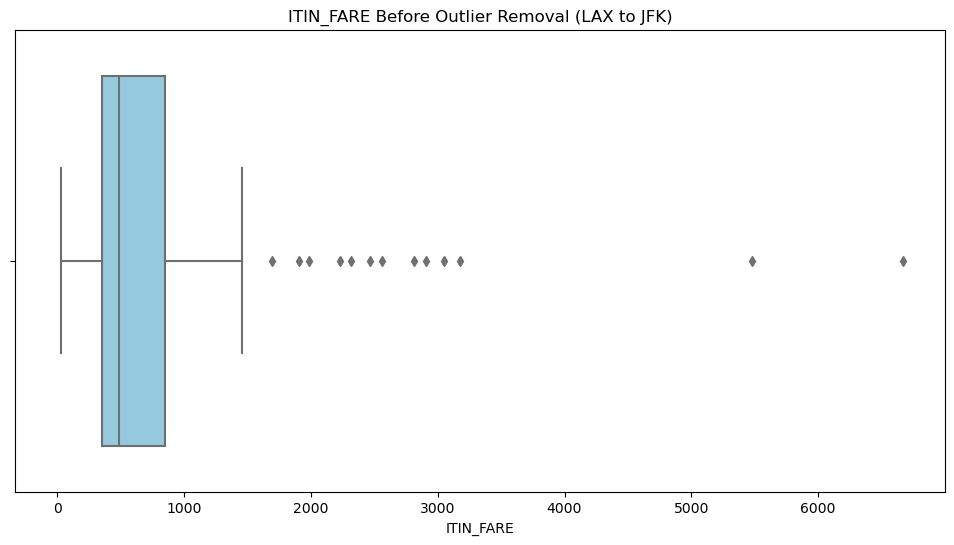

In [76]:
# Filtering data for the specific route with the maximum number of outliers
route_data = tickets_df_with_thresholds[(tickets_df_with_thresholds['ORIGIN'] == max_outliers_route['ORIGIN']) & (tickets_df_with_thresholds['DESTINATION'] == max_outliers_route['DESTINATION'])]

# Plotting before outlier removal
plt.figure(figsize=(12, 6))

plt.plot(1, 2, 1)
sns.boxplot(x=route_data['ITIN_FARE'], color='skyblue')
plt.title(f'ITIN_FARE Before Outlier Removal ({max_outliers_route["ORIGIN"]} to {max_outliers_route["DESTINATION"]})')
plt.xlabel('ITIN_FARE')

In [77]:
# Removing outliers from the entire dataset
tickets_df = tickets_df_with_thresholds[~tickets_df_with_thresholds['OUTLIER']].copy()

# Dropping the unnecessary columns
columns_to_drop = ['OUTLIER', 'outlier_threshold_low', 'outlier_threshold_high']
tickets_df.drop(columns=columns_to_drop, inplace=True)

# Displaying the final cleaned dataframe
print(tickets_df.head())


        ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0  201914142309  2019        1    SEA             US               WA   
1  201914144082  2019        1    SEA             US               WA   
2   20191985587  2019        1    SEA             US               WA   
3   20191985586  2019        1    SEA             US               WA   
4   20191985557  2019        1    SEA             US               WA   

  ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE  \
0      Washington        1.0                UA         1.0      585.0   
1      Washington        1.0                UA         1.0      618.0   
2      Washington        1.0                AA         1.0      734.0   
3      Washington        1.0                AA         1.0      363.0   
4      Washington        1.0                AA         1.0       11.0   

  DESTINATION  
0         RSW  
1         RSW  
2         RSW  
3         RSW  
4         RSW  


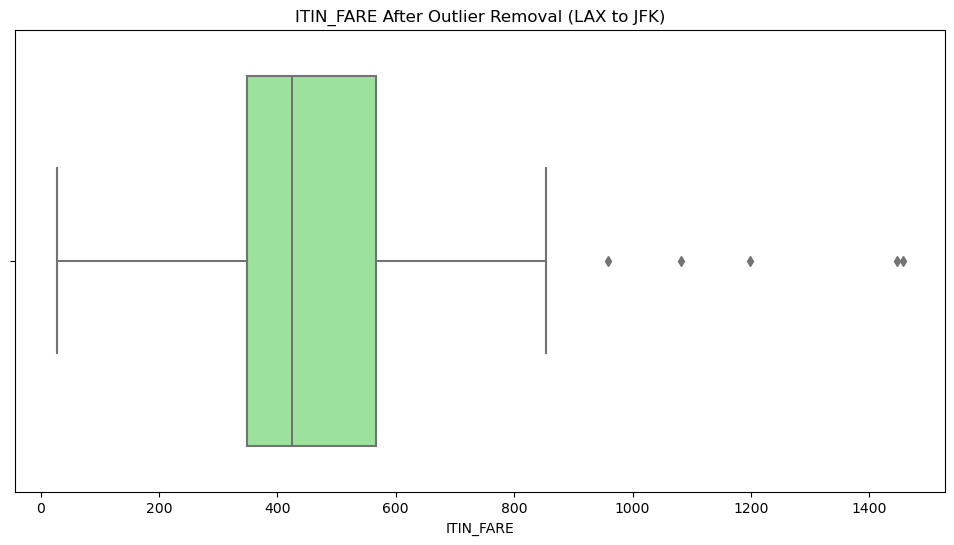

In [78]:
# Filter data for the specific route with the maximum number of outliers from the cleaned dataset
route_data_cleaned = tickets_df[(tickets_df['ORIGIN'] == max_outliers_route['ORIGIN']) & (tickets_df['DESTINATION'] == max_outliers_route['DESTINATION'])]

# Plot after outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(x=route_data_cleaned['ITIN_FARE'], color='lightgreen')
plt.title(f'ITIN_FARE After Outlier Removal ({max_outliers_route["ORIGIN"]} to {max_outliers_route["DESTINATION"]})')
plt.xlabel('ITIN_FARE')
plt.show()


Adding new feature named AVG_ITIN_FARE:

Calculated the average itinerary fare for each origin-destination pair in the tickets_df DataFrame. It starts by grouping the data by ORIGIN and DESTINATION, then computes the mean of the ITIN_FARE for each group. This results in a new DataFrame, avg_itin_fare, which contains the average fare for each route. The ITIN_FARE column in this DataFrame is then renamed to AVG_ITIN_FARE to reflect that it represents the average fare. Next, the avg_itin_fare DataFrame is merged back into the original tickets_df DataFrame based on the ORIGIN and DESTINATION columns. This merge adds a new column, AVG_ITIN_FARE, to the original dataset. Finally, the updated tickets_df DataFrame includes the average fare. 

Metadata for AVG_ITIN_FARE : Includes average itinerary fare for each route in the dataset for enhanced analysis.

In [79]:
# Calculate the average itinerary fare for each origin-destination pair
avg_itin_fare = tickets_df.groupby(['ORIGIN', 'DESTINATION'])['ITIN_FARE'].mean().reset_index()

# Rename the column to reflect that it is the average fare
avg_itin_fare = avg_itin_fare.rename(columns={'ITIN_FARE': 'AVG_ITIN_FARE'})

# Merge the average fare ba ck to the original dataframe
tickets_df = tickets_df.merge(avg_itin_fare, on=['ORIGIN', 'DESTINATION'], how='left')

# Display the dataframe after merging the average fare
print(tickets_df.head())

        ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0  201914142309  2019        1    SEA             US               WA   
1  201914144082  2019        1    SEA             US               WA   
2   20191985587  2019        1    SEA             US               WA   
3   20191985586  2019        1    SEA             US               WA   
4   20191985557  2019        1    SEA             US               WA   

  ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE  \
0      Washington        1.0                UA         1.0      585.0   
1      Washington        1.0                UA         1.0      618.0   
2      Washington        1.0                AA         1.0      734.0   
3      Washington        1.0                AA         1.0      363.0   
4      Washington        1.0                AA         1.0       11.0   

  DESTINATION  AVG_ITIN_FARE  
0         RSW          427.0  
1         RSW          427.0  
2         RSW          427.0 

In [80]:
# Drop all columns except ORIGIN, DESTINATION, and ITIN_FARE
tickets = tickets_df[['ORIGIN', 'DESTINATION', 'AVG_ITIN_FARE']]

Creating new dataframe named tickets which will have only Origin, Destination and AVG_ITIN_FARE. I used this dataframe while merging the datasets.

In [81]:
# Creating a new DataFrame with only the necessary columns
tickets = tickets_df[['ORIGIN', 'DESTINATION', 'AVG_ITIN_FARE']].copy()

# Identifying duplicate rows
duplicate_rows = tickets[tickets.duplicated()]

# Dropping duplicate rows
tickets.drop_duplicates(inplace=True)

In [82]:
tickets.head()

,ORIGIN,DESTINATION,AVG_ITIN_FARE
0,SEA,RSW,427.000000
7,SEA,SLC,331.500000
33,PBI,CAK,648.000000
34,SLC,TUL,310.400000
39,SAT,PHL,466.888889


In [83]:
# Summary Statistics
summary_statistics = tickets.describe()
print(summary_statistics)

       AVG_ITIN_FARE
count   17866.000000
mean      503.185132
std       279.531079
min         0.000000
25%       343.500000
50%       459.000000
75%       608.000000
max      5689.000000


In [84]:
print(tickets.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17866 entries, 0 to 67247
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ORIGIN         17866 non-null  object 
 1   DESTINATION    17866 non-null  object 
 2   AVG_ITIN_FARE  17866 non-null  float64
dtypes: float64(1), object(2)
memory usage: 558.3+ KB
None


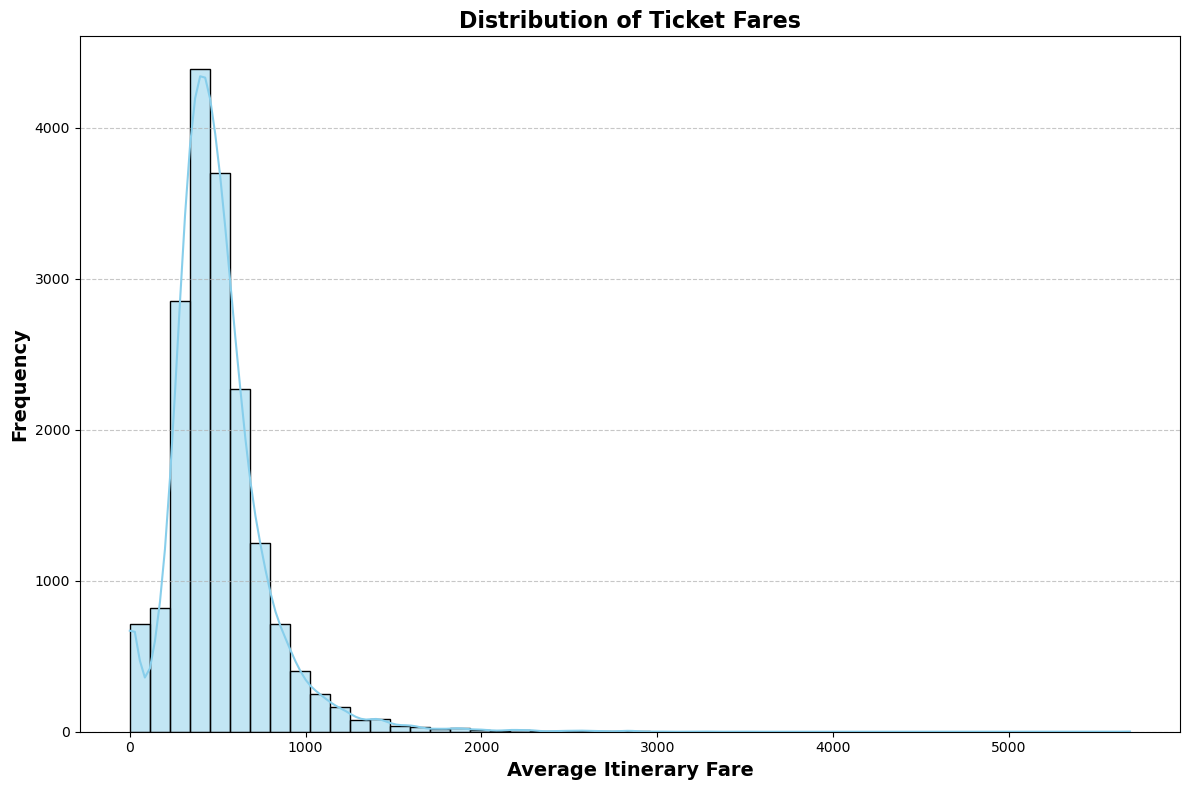

In [85]:
# Plot the distribution of ticket fares
plt.figure(figsize=(12, 8))
sns.histplot(tickets['AVG_ITIN_FARE'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Ticket Fares', fontsize=16, fontweight='bold')
plt.xlabel('Average Itinerary Fare', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The histogram of ticket fares provides several insights:

Distribution Shape: The distribution of ticket fares is right-skewed, meaning that while most fares are clustered towards the lower end, there are a few very high fares. The higher fare suggests that there are certain route which are rare and have higher fare compared to other routes.

Frequency of Fares: The majority of ticket fares fall within the range of $100 to $1000. This indicates that most passengers pay within this range for their flights.

Outliers: There are some outliers with ticket fares exceeding $2000, but these are relatively rare.

Peak Frequency: The highest frequency of ticket fares is around $200 to $300, suggesting that this is a common fare range for many flights.

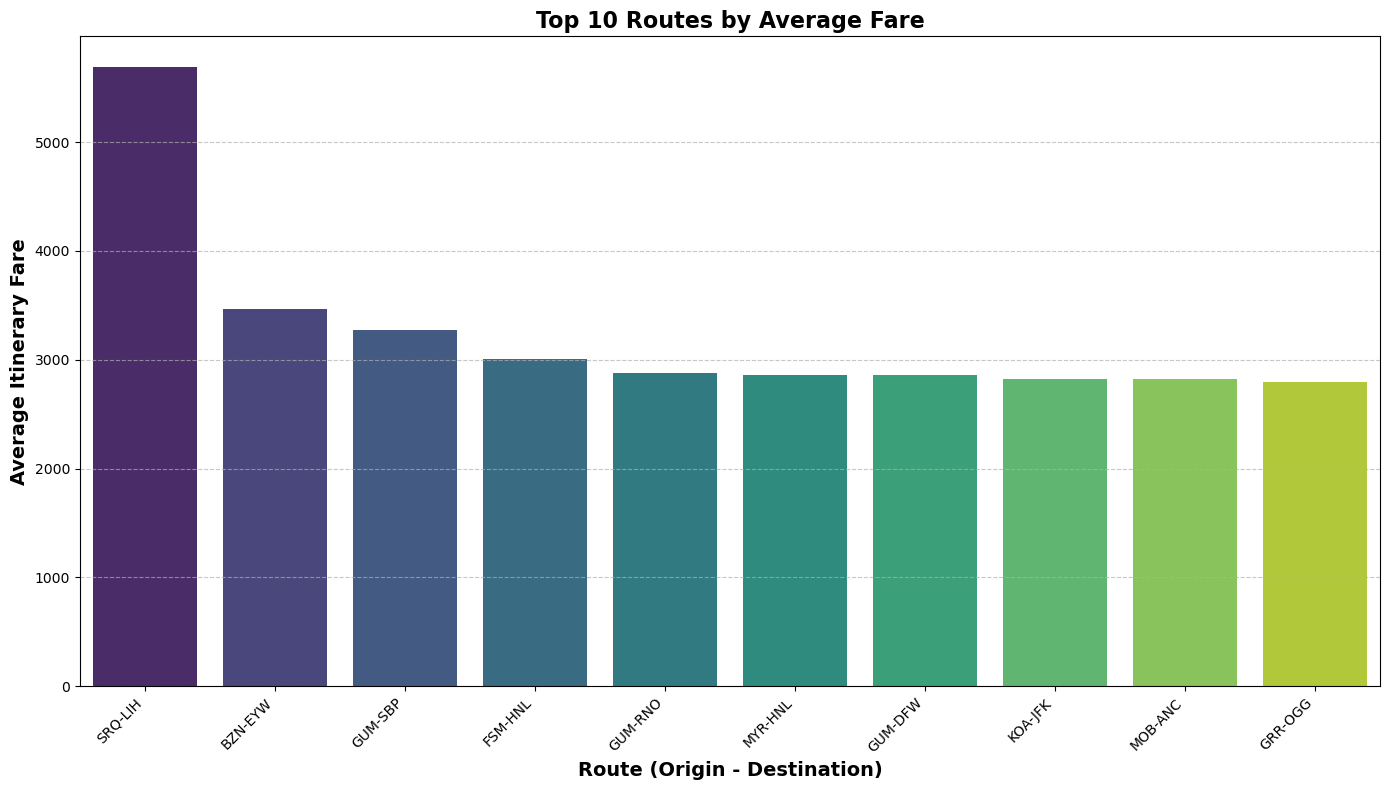

In [86]:
# Identify the routes with the highest average fares
top_routes_by_fare = tickets.groupby(['ORIGIN', 'DESTINATION'])['AVG_ITIN_FARE'].mean().reset_index()
top_routes_by_fare = top_routes_by_fare.sort_values(by='AVG_ITIN_FARE', ascending=False).head(10)

# Plot the top routes by average fare
plt.figure(figsize=(14, 8))
sns.barplot(data=top_routes_by_fare, y='AVG_ITIN_FARE', x=top_routes_by_fare['ORIGIN'] + '-' + top_routes_by_fare['DESTINATION'], palette='viridis')
plt.title('Top 10 Routes by Average Fare', fontsize=16, fontweight='bold')
plt.xlabel('Route (Origin - Destination)', fontsize=14, fontweight='bold')
plt.ylabel('Average Itinerary Fare', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar chart shows the top 10 routes by average itinerary fare. Here's what we can infer from it:

Highest Fare Route: The route SRQ-UIH has the highest average fare by a significant margin, indicating a high-cost route compared to others.

Other High Fare Routes: The routes BZN-EYW and GUM-SBP follow, with average fares considerably higher than the remaining routes in the top 10. These routes might serve particular markets or see more demand, which would result in higher fares.

Range of Average Fares: While SRQ-UIH stands out with an average fare above $5000, the rest of the routes have average fares ranging between $2000 and $4000. This range suggests variability in ticket pricing based on factors like distance, demand, and market segmentation.

Metadata for tickets dataframe:

ORIGIN : Origin Airport Code, International Air Transport Association Airport Code (IATA) which is unique for each airport

DESTINATION : Destination Airport Code, International Air Transport Association Airport Code (IATA) which is unique for each airport

AVG_ITIN_FARE : Average itinerary fare for each route in the dataset for enhanced analysis.

Loading Airport_Codes Dataset

In [87]:
# Loading Airport_Codes dataset
airport_codes_df = pd.read_csv('airport_codes.csv')

In [88]:
# Filtering the airport codes dataframe for US airports and keeping only 'TYPE', 'NAME', 'IATA_CODE' columns
airport_codes_df = airport_codes_df[airport_codes_df['ISO_COUNTRY'] == 'US'][['TYPE', 'NAME', 'IATA_CODE']]

# Printing airport_codes_df
print(airport_codes_df.head())


            TYPE                                NAME IATA_CODE
0       heliport                   Total Rf Heliport       NaN
1  small_airport                Aero B Ranch Airport       NaN
2  small_airport                        Lowell Field       NaN
3  small_airport                        Epps Airpark       NaN
4         closed  Newport Hospital & Clinic Heliport       NaN


In [89]:
# Keeping only medium and large airports
airport_codes_df = airport_codes_df[airport_codes_df['TYPE'].isin(['medium_airport', 'large_airport'])]

# Printing the filtered dataframe
print(airport_codes_df.head())

                 TYPE                                               NAME  \
6194   medium_airport                            Aleknagik / New Airport   
25963  medium_airport  South Alabama Regional At Bill Benton Field Ai...   
26143  medium_airport                Lehigh Valley International Airport   
26144  medium_airport                           Abilene Regional Airport   
26145   large_airport                  Albuquerque International Sunport   

      IATA_CODE  
6194        WKK  
25963       NaN  
26143       ABE  
26144       ABI  
26145       ABQ  


In [90]:
# Removing duplicates from the filtered US airport codes dataframe
airport_codes_df = airport_codes_df.drop_duplicates()

# Printing airport_codes_df
print(airport_codes_df.head())

                 TYPE                                               NAME  \
6194   medium_airport                            Aleknagik / New Airport   
25963  medium_airport  South Alabama Regional At Bill Benton Field Ai...   
26143  medium_airport                Lehigh Valley International Airport   
26144  medium_airport                           Abilene Regional Airport   
26145   large_airport                  Albuquerque International Sunport   

      IATA_CODE  
6194        WKK  
25963       NaN  
26143       ABE  
26144       ABI  
26145       ABQ  


In [91]:
# Checking for the null values in airport_codes_df
null_values(airport_codes_df)

Missing values in each column:
TYPE          0
NAME          0
IATA_CODE    37
dtype: int64


In [92]:
# Filling missing values in the IATA_CODE column with 'UNKNOWN'
airport_codes_df['IATA_CODE'] = airport_codes_df['IATA_CODE'].fillna('UNKNOWN')

# Displaying the dataframe with handled missing values
print(airport_codes_df.head())


                 TYPE                                               NAME  \
6194   medium_airport                            Aleknagik / New Airport   
25963  medium_airport  South Alabama Regional At Bill Benton Field Ai...   
26143  medium_airport                Lehigh Valley International Airport   
26144  medium_airport                           Abilene Regional Airport   
26145   large_airport                  Albuquerque International Sunport   

      IATA_CODE  
6194        WKK  
25963   UNKNOWN  
26143       ABE  
26144       ABI  
26145       ABQ  


In [93]:
# Calculating how many Unknown IATA Codes are large and medium types
medium_unknown = airport_codes_df[(airport_codes_df['TYPE'] == 'medium_airport') & (airport_codes_df['IATA_CODE'] == 'UNKNOWN')].shape[0]
large_unknown = airport_codes_df[(airport_codes_df['TYPE'] == 'large_airport') & (airport_codes_df['IATA_CODE'] == 'UNKNOWN')].shape[0]

print(f"Medium airports with 'UNKNOWN' IATA code: {medium_unknown}")
print(f"Large airports with 'UNKNOWN' IATA code: {large_unknown}")


Medium airports with 'UNKNOWN' IATA code: 36
Large airports with 'UNKNOWN' IATA code: 1


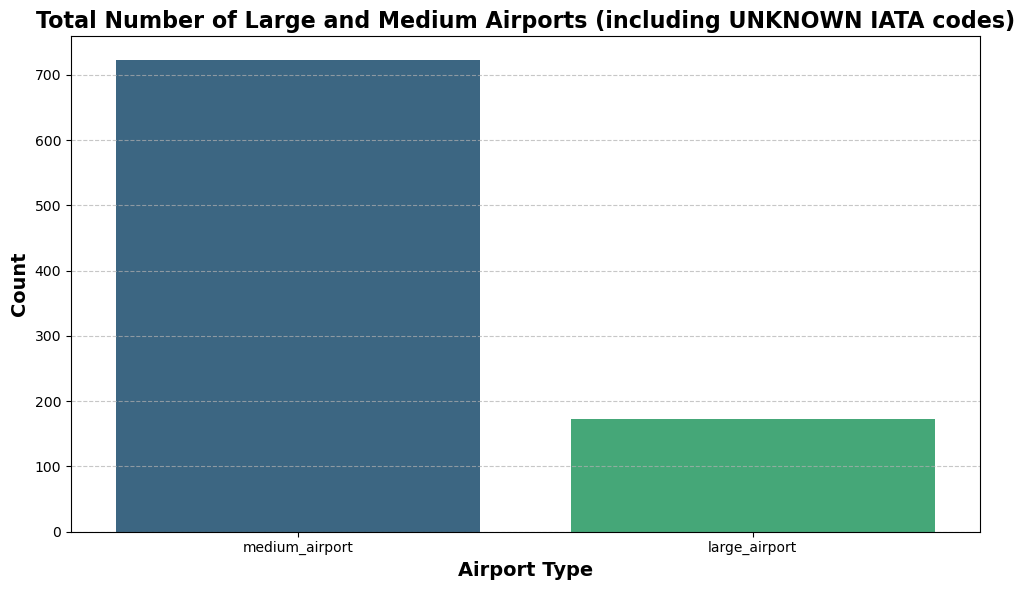

In [94]:
# Count the number of large and medium airports
airport_type_counts = airport_codes_df['TYPE'].value_counts()

# Adjust counts for 'UNKNOWN' IATA codes
adjusted_counts = airport_type_counts.copy()
adjusted_counts['medium_airport'] += 36   # In the above result we saw that 36 Unknown airports are medium type
adjusted_counts['large_airport'] += 1     # In the above result we saw that 1 Unknown airports are large type

# Plot the distribution of large and medium airports
plt.figure(figsize=(10, 6))
sns.barplot(x=adjusted_counts.index, y=adjusted_counts.values, palette='viridis')
plt.title('Total Number of Large and Medium Airports (including UNKNOWN IATA codes)', fontsize=16, fontweight='bold')
plt.xlabel('Airport Type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Merging Datasets for Our Analysis

To merge flight and airport datasets effectively, I followed these steps:

1. Filter Non-Canceled Flights:I started by creating a new dataframe flights_df2 that includes only the non-canceled flights from the original flights_df dataframe.

2.Identify Missing IATA Codes:
I extracted the unique IATA codes from the ORIGIN and DESTINATION columns in flights_df2.
I then combined these unique codes to form a complete set of IATA codes present in the flights data.
Next, I obtained the unique IATA codes from the airport codes dataframe airport_codes_df.
By comparing these two sets, I identified any missing IATA codes that were present in the flights data but not in the airport codes data.

3.Handle Flights with Missing IATA Codes:
I filtered out the flights where the ORIGIN or DESTINATION IATA code was missing from the airport codes.

4.Merge Flights with Airport Codes:
I performed a left merge of flights_df2 with airport_codes_df on the ORIGIN column to get the airport types, adding a suffix _ORIGIN for clarity.
I repeated this process by merging on the DESTINATION column, adding a suffix _DEST to differentiate between origin and destination airport types.
After merging, I dropped the redundant IATA code columns that were added during the merge.
I renamed the TYPE columns to ORIGIN_TYPE and DESTINATION_TYPE for better clarity.

5.Handle UNKNOWN IATA Codes:
For any missing airport types, I filled the ORIGIN_TYPE and DESTINATION_TYPE with the value 'medium'(as previously we saw that 36 out 37 airports with missing IATA codes were identified as medium, so I made this assumption). 

6.Merge with Ticket Data:
Finally, I merged the flights_with_airports with the ticket data (tickets) on the ORIGIN and DESTINATION columns to ensure that each flight record had the corresponding ticket information.

In [95]:
# Creating a new dataframe flights_df2 which has only non-canceled flights
flights_df2 = flights_df[flights_df['CANCELLED'] == 0]

In [96]:
flights_df2

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,Month,Weekday,passenger_occupancy
0,2019-03-02,WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.970000,Mar,Saturday,194
1,2019-03-09,WN,3016,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-7.0,-22.0,0.0,137.0,1025.0,0.630000,Mar,Saturday,126
2,2019-03-24,UA,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-16.0,-9.0,0.0,129.0,1025.0,0.980000,Mar,Sunday,196
3,2019-03-11,UA,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-1.0,8.0,0.0,138.0,1025.0,0.360000,Mar,Monday,72
4,2019-03-10,UA,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-6.0,1.0,0.0,141.0,1025.0,0.450000,Mar,Sunday,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911336,2019-03-02,WN,3223,14635,RSW,"Fort Myers, FL",14635,RSW,"Fort Myers, FL",0.0,11.0,0.0,2.0,2323.0,0.698704,Mar,Saturday,140
1911337,2019-03-02,WN,7565,14635,RSW,"Fort Myers, FL",14679,SAN,"San Diego, CA",-2.0,-4.0,0.0,164.0,1105.0,0.355796,Mar,Saturday,71
1911338,2019-01-09,NK,45645,14635,RSW,"Fort Myers, FL",14679,SAN,"San Diego, CA",10.0,7.0,0.0,2.0,234.0,0.993263,Jan,Wednesday,199
1911339,2019-01-31,AA,2643,13303,MIA,"Miami, FL",13342,MKE,"Milwaukee, WI",-3.0,-1.0,0.0,2.0,1183.0,0.938014,Jan,Thursday,188


In [97]:
# Identify Missing IATA Codes
# Get unique IATA codes in Flights data for ORIGIN and DESTINATION
origin_iata_codes = flights_df2['ORIGIN'].unique()
destination_iata_codes = flights_df2['DESTINATION'].unique()

# Combining unique IATA codes from both ORIGIN and DESTINATION
all_flight_iata_codes = set(origin_iata_codes).union(set(destination_iata_codes))

# Identifying IATA codes in Airport Codes
airport_iata_codes = set(airport_codes_df['IATA_CODE'].unique())

# Finding missing IATA codes
missing_iata_codes = all_flight_iata_codes - airport_iata_codes

In [98]:
missing_iata_codes

{'ATW',
 'BQN',
 'CNY',
 'DRO',
 'DVL',
 'EAR',
 'ESC',
 'GUC',
 'GUM',
 'HDN',
 'HHH',
 'IMT',
 'MKG',
 'MMH',
 'OGS',
 'PGD',
 'PPG',
 'PSE',
 'PUB',
 'SHD',
 'SJU',
 'SPN',
 'STT',
 'STX',
 'USA'}

In [99]:
#  Handling UNKNOWN IATA Codes
# Filtering flights where ORIGIN or DESTINATION is in the missing IATA codes
flights_with_missing_iata = flights_df2[
    (flights_df2['ORIGIN'].isin(missing_iata_codes)) | 
    (flights_df2['DESTINATION'].isin(missing_iata_codes))
]

In [100]:
# Merging Flights with Airport Codes for ORIGIN
flights_with_airports_origin = flights_df2.merge(
    airport_codes_df[['IATA_CODE', 'TYPE']], left_on='ORIGIN', right_on='IATA_CODE', how='left', suffixes=('', '_ORIGIN')
)

# Merging Flights with Airport Codes for DESTINATION
flights_with_airports = flights_with_airports_origin.merge(
    airport_codes_df[['IATA_CODE', 'TYPE']], left_on='DESTINATION', right_on='IATA_CODE', how='left', suffixes=('', '_DEST')
)


In [101]:
# Dropping the extra IATA_CODE columns
flights_with_airports = flights_with_airports.drop(columns=['IATA_CODE', 'IATA_CODE_DEST'])

# Renaming the TYPE columns for clarity
flights_with_airports = flights_with_airports.rename(columns={
    'TYPE': 'ORIGIN_TYPE',
    'TYPE_DEST': 'DESTINATION_TYPE'
})


In [102]:
# Handling UNKNOWN IATA codes
flights_with_airports['ORIGIN_TYPE'] = flights_with_airports['ORIGIN_TYPE'].fillna('medium')
flights_with_airports['DESTINATION_TYPE'] = flights_with_airports['DESTINATION_TYPE'].fillna('medium')


In [103]:
# Printing merged data
print("Flights with Airports DataFrame (with UNKNOWN mappings):")
print(flights_with_airports.head())


Flights with Airports DataFrame (with UNKNOWN mappings):
     FL_DATE OP_CARRIER OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN  \
0 2019-03-02         WN              4591             14635    RSW   
1 2019-03-09         WN              3016             14635    RSW   
2 2019-03-24         UA              2350             14635    RSW   
3 2019-03-11         UA              2350             14635    RSW   
4 2019-03-10         UA              2350             14635    RSW   

  ORIGIN_CITY_NAME DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  \
0   Fort Myers, FL           11042         CLE  Cleveland, OH       -8.0   
1   Fort Myers, FL           11042         CLE  Cleveland, OH       -7.0   
2   Fort Myers, FL           11042         CLE  Cleveland, OH      -16.0   
3   Fort Myers, FL           11042         CLE  Cleveland, OH       -1.0   
4   Fort Myers, FL           11042         CLE  Cleveland, OH       -6.0   

   ARR_DELAY  CANCELLED  AIR_TIME  DISTANCE  OCCUPANCY_RATE Month

In [104]:
flights_with_airports

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,Month,Weekday,passenger_occupancy,ORIGIN_TYPE,DESTINATION_TYPE
0,2019-03-02,WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.970000,Mar,Saturday,194,large_airport,large_airport
1,2019-03-09,WN,3016,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-7.0,-22.0,0.0,137.0,1025.0,0.630000,Mar,Saturday,126,large_airport,large_airport
2,2019-03-24,UA,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-16.0,-9.0,0.0,129.0,1025.0,0.980000,Mar,Sunday,196,large_airport,large_airport
3,2019-03-11,UA,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-1.0,8.0,0.0,138.0,1025.0,0.360000,Mar,Monday,72,large_airport,large_airport
4,2019-03-10,UA,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-6.0,1.0,0.0,141.0,1025.0,0.450000,Mar,Sunday,90,large_airport,large_airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859857,2019-03-02,WN,3223,14635,RSW,"Fort Myers, FL",14635,RSW,"Fort Myers, FL",0.0,11.0,0.0,2.0,2323.0,0.698704,Mar,Saturday,140,large_airport,large_airport
1859858,2019-03-02,WN,7565,14635,RSW,"Fort Myers, FL",14679,SAN,"San Diego, CA",-2.0,-4.0,0.0,164.0,1105.0,0.355796,Mar,Saturday,71,large_airport,large_airport
1859859,2019-01-09,NK,45645,14635,RSW,"Fort Myers, FL",14679,SAN,"San Diego, CA",10.0,7.0,0.0,2.0,234.0,0.993263,Jan,Wednesday,199,large_airport,large_airport
1859860,2019-01-31,AA,2643,13303,MIA,"Miami, FL",13342,MKE,"Milwaukee, WI",-3.0,-1.0,0.0,2.0,1183.0,0.938014,Jan,Thursday,188,large_airport,large_airport


In [105]:
# Verifying if the UNKNOWN IATA were mapped correctly

# Defining the set of missing IATA codes
missing_iata_codes = {'ATW', 'BQN', 'CNY', 'DRO', 'DVL', 'EAR', 'ESC', 'GUC', 'GUM', 'HDN', 
                      'HHH', 'IMT', 'MKG', 'MMH', 'OGS', 'PGD', 'PPG', 'PSE', 'PUB', 'SHD', 
                      'SJU', 'SPN', 'STT', 'STX', 'USA'}

# Filtering flights with airports DataFrame for rows where ORIGIN or DESTINATION is in missing IATA codes
flights_missing_iata = flights_with_airports[
    (flights_with_airports['ORIGIN'].isin(missing_iata_codes)) | 
    (flights_with_airports['DESTINATION'].isin(missing_iata_codes))
]

# Printing the relevant columns to check the type mapping
print("Flights with Missing IATA Codes and Their Types:")
print(flights_missing_iata[['ORIGIN', 'DESTINATION', 'ORIGIN_TYPE', 'DESTINATION_TYPE']])


Flights with Missing IATA Codes and Their Types:
        ORIGIN DESTINATION    ORIGIN_TYPE DESTINATION_TYPE
59408      SJU         BWI         medium    large_airport
59409      SJU         BWI         medium    large_airport
59410      SJU         BWI         medium    large_airport
59411      SJU         BWI         medium    large_airport
59412      SJU         BWI         medium    large_airport
...        ...         ...            ...              ...
1859637    STX         SJU         medium           medium
1859638    STX         SJU         medium           medium
1859639    STX         SJU         medium           medium
1859838    STT         IAH         medium    large_airport
1859839    IAH         STT  large_airport           medium

[31815 rows x 4 columns]


In [106]:
tickets

,ORIGIN,DESTINATION,AVG_ITIN_FARE
0,SEA,RSW,427.000000
7,SEA,SLC,331.500000
33,PBI,CAK,648.000000
34,SLC,TUL,310.400000
39,SAT,PHL,466.888889
...,...,...,...
67243,SHV,MAF,481.000000
67244,JLN,MSP,399.000000
67245,DAB,ORF,316.000000
67246,BHM,SMF,11.000000


In [107]:
# Merging with Tickets to ensure we have corresponding ticket information
merged_data = flights_with_airports.merge(
    tickets, left_on=['ORIGIN', 'DESTINATION'], right_on=['ORIGIN', 'DESTINATION']
)

In [108]:
# Printing the merged data
print("\nMerged DataFrame:")
print(merged_data.head())
print("Columns in merged data:", merged_data.columns)


Merged DataFrame:
     FL_DATE OP_CARRIER OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN  \
0 2019-03-02         WN              4591             14635    RSW   
1 2019-03-09         WN              3016             14635    RSW   
2 2019-03-24         UA              2350             14635    RSW   
3 2019-03-11         UA              2350             14635    RSW   
4 2019-03-10         UA              2350             14635    RSW   

  ORIGIN_CITY_NAME DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  ...  \
0   Fort Myers, FL           11042         CLE  Cleveland, OH       -8.0  ...   
1   Fort Myers, FL           11042         CLE  Cleveland, OH       -7.0  ...   
2   Fort Myers, FL           11042         CLE  Cleveland, OH      -16.0  ...   
3   Fort Myers, FL           11042         CLE  Cleveland, OH       -1.0  ...   
4   Fort Myers, FL           11042         CLE  Cleveland, OH       -6.0  ...   

   CANCELLED  AIR_TIME  DISTANCE  OCCUPANCY_RATE  Month   Weekday  \
0   

In [109]:
merged_data

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,...,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,Month,Weekday,passenger_occupancy,ORIGIN_TYPE,DESTINATION_TYPE,AVG_ITIN_FARE
0,2019-03-02,WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,...,0.0,143.0,1025.0,0.970000,Mar,Saturday,194,large_airport,large_airport,177.888889
1,2019-03-09,WN,3016,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-7.0,...,0.0,137.0,1025.0,0.630000,Mar,Saturday,126,large_airport,large_airport,177.888889
2,2019-03-24,UA,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-16.0,...,0.0,129.0,1025.0,0.980000,Mar,Sunday,196,large_airport,large_airport,177.888889
3,2019-03-11,UA,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-1.0,...,0.0,138.0,1025.0,0.360000,Mar,Monday,72,large_airport,large_airport,177.888889
4,2019-03-10,UA,2350,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-6.0,...,0.0,141.0,1025.0,0.450000,Mar,Sunday,90,large_airport,large_airport,177.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727607,2019-01-08,UA,536,14771,SFO,"San Francisco, CA",10599,BHM,"Birmingham, AL",60.0,...,0.0,220.0,2013.0,0.750000,Jan,Tuesday,150,large_airport,large_airport,1081.000000
1727608,2019-01-08,UA,280,14771,SFO,"San Francisco, CA",10599,BHM,"Birmingham, AL",-3.0,...,0.0,214.0,2013.0,0.430000,Jan,Tuesday,86,large_airport,large_airport,1081.000000
1727609,2019-03-02,WN,7565,14635,RSW,"Fort Myers, FL",14679,SAN,"San Diego, CA",-2.0,...,0.0,164.0,1105.0,0.355796,Mar,Saturday,71,large_airport,large_airport,637.666667
1727610,2019-01-09,NK,45645,14635,RSW,"Fort Myers, FL",14679,SAN,"San Diego, CA",10.0,...,0.0,2.0,234.0,0.993263,Jan,Wednesday,199,large_airport,large_airport,637.666667


In [110]:
# Converting data types
merged_data['OCCUPANCY_RATE'] = merged_data['OCCUPANCY_RATE'].astype(float)
merged_data['AVG_ITIN_FARE'] = merged_data['AVG_ITIN_FARE'].astype(float)
merged_data['DISTANCE'] = merged_data['DISTANCE'].astype(float)
merged_data['DEP_DELAY'] = merged_data['DEP_DELAY'].astype(float)
merged_data['ARR_DELAY'] = merged_data['ARR_DELAY'].astype(float)

In [111]:
# Checking data types
print(merged_data.dtypes)

FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM              object
ORIGIN_AIRPORT_ID              object
ORIGIN                         object
ORIGIN_CITY_NAME               object
DEST_AIRPORT_ID                object
DESTINATION                    object
DEST_CITY_NAME                 object
DEP_DELAY                     float64
ARR_DELAY                     float64
CANCELLED                     float64
AIR_TIME                      float64
DISTANCE                      float64
OCCUPANCY_RATE                float64
Month                          object
Weekday                        object
passenger_occupancy             int32
ORIGIN_TYPE                    object
DESTINATION_TYPE               object
AVG_ITIN_FARE                 float64
dtype: object


Metadata for the merged data:

FL_DATE: Date of the flight
OP_CARRIER: Operating commercial carrier Flight code

OP_CARRIER_FL_NUM:Operating commercial carrier Flight numberr
ORIGIN_AIRPORT_ID:Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. D
ORIGIN:Origin Airport, International Air Transport Association (IATA) Airport Codee
ORIGIN_CITY_NAME:Origin Airport, City Name		e
DEST_AIRPORT_ID:Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.D
DESTINATION:Destination Airport, Operating commercial carrier Flight code (IATA )Airport Codee
DEST_CITY_NAME:Destination Airport, City Namee
DEP_DELAY:Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.s
ARR_DELAY:Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.s
CANCELLED:Cancelled Flight Indicator (0 = Non Cancelled))
AIR_TIME:Flight Time, in Minutes		s
DISTANCE:Distance between Origin and Destination Airports in Miless
OCCUPANCY_RATE:Occupancy rate of the flightt
Month: Month of the flight
Weekday: Day of the week of the flight
passenger_occupancy: Number of passengers based on occupancy rate
ORIGIN_TYPE: Type of origin airport
DESTINATION_TYPE: Type of destination airport
AVG_ITIN_FARE: Average itinerary fare for routes

Aggregating Flight Information Based on Round Trip Pairs

To further analyze the data, I aggregated the flight information based on round trip pairs. I created a unique key for each round trip by sorting and combining the origin and destination airports. Then, I grouped the data by this key and calculated the average for relevant columns, including delays, air time, distance, occupancy rate, and fare. I also multiplied the mean distance and air time by two to get round trip totals. Finally, I cleaned up the dataframe by renaming columns for clarity and dropping intermediate columns. This allowed me to get a comprehensive view of the round trip flight performance.

In [112]:
# Including ORIGIN_TYPE and DESTINATION_TYPE in Aggregation
merged_data['round_trip_key'] = merged_data.apply(lambda row: tuple(sorted([row['ORIGIN'], row['DESTINATION']])), axis=1)

# Grouping by round trip key and calculate the mean for relevant columns
grouped = merged_data.groupby('round_trip_key').agg({
    'DEP_DELAY': 'mean',
    'ARR_DELAY': 'mean',
    'AIR_TIME': 'mean',
    'DISTANCE': 'mean',
    'OCCUPANCY_RATE': 'mean',
    'AVG_ITIN_FARE': 'mean',
    'ORIGIN_TYPE': 'first',
    'DESTINATION_TYPE': 'first'
}).reset_index()

# Multiply the mean distance and air time by 2 to get the round trip totals
grouped['total_air_time'] = grouped['AIR_TIME'] * 2
grouped['total_distance'] = grouped['DISTANCE'] * 2

# Rename columns 
grouped = grouped.rename(columns={
    'DEP_DELAY': 'avg_dep_delay',
    'ARR_DELAY': 'avg_arr_delay',
    'OCCUPANCY_RATE': 'avg_occupancy_rate',
    'AVG_ITIN_FARE': 'avg_itin_fare'
})

# Dropping the columns
grouped = grouped.drop(columns=['AIR_TIME', 'DISTANCE'])

# Display the aggregated data
print(grouped.head())


  round_trip_key  avg_dep_delay  avg_arr_delay  avg_occupancy_rate  \
0     (ABE, ATL)      -0.616359      -2.942396            0.654332   
1     (ABE, CLT)      -1.919323      -2.090637            0.661096   
2     (ABE, DTW)       0.782696      -3.095573            0.645392   
3     (ABE, FLL)       1.459375      -0.212500            0.605250   
4     (ABE, ORD)      17.908594      17.172656            0.649094   

   avg_itin_fare     ORIGIN_TYPE DESTINATION_TYPE  total_air_time  \
0     621.976190   large_airport   medium_airport      199.354839   
1     442.125000  medium_airport    large_airport      171.039841   
2     553.488934  medium_airport    large_airport      143.289738   
3     201.500000  medium_airport    large_airport      294.850000   
4     606.595312  medium_airport    large_airport      192.721875   

   total_distance  
0          1384.0  
1           962.0  
2           850.0  
3          2082.0  
4          1308.0  


Calculating Revenue, Costs, and Profit for Aggregated Round Trip Data
I performed the following calculations:

Revenue Calculation: I defined a function to calculate the total revenue for each route by considering both ticket revenue and baggage fees. The ticket revenue is based on the average occupancy rate and fare, while baggage fees are calculated assuming each passenger carries baggage.

Cost Calculation: I created a function to calculate the total costs for each route. This includes flight costs based on distance, airport fees based on the type of airport (medium or large), and additional costs incurred due to departure and arrival delays.

Profit Calculation: I calculated the profit for each route by subtracting the total costs from the total revenue.

In [113]:
# Define revenue calculation
def calculate_revenue(row):
    occupancy_rate = row['avg_occupancy_rate']
    passengers = occupancy_rate * 200
    ticket_revenue = passengers * row['avg_itin_fare']  # AVG_ITIN_FARE is for round trip
    baggage_fee = passengers * 0.5 * 70  # $70 for round trip
    total_revenue = ticket_revenue + baggage_fee
    return total_revenue

# Apply revenue calculation to the aggregated data
grouped['revenue'] = grouped.apply(calculate_revenue, axis=1)


In [114]:
# Function to determine airport fee based on airport type
def get_airport_fee(airport_type):
    if airport_type == 'medium_airport':
        return 5000
    elif airport_type == 'large_airport':
        return 10000
    return 0

# Define cost calculation with actual airport type handling
def calculate_costs_with_delay(row):
    distance = row['total_distance']
    flight_costs = distance * (8 + 1.18)
    
    origin_type = row['ORIGIN_TYPE']
    destination_type = row['DESTINATION_TYPE']
    
    total_airport_fees = get_airport_fee(origin_type) + get_airport_fee(destination_type)
    
    dep_delay_cost = max(0, row['avg_dep_delay'] - 15) * 75
    arr_delay_cost = max(0, row['avg_arr_delay'] - 15) * 75
    
    total_costs = flight_costs + total_airport_fees + dep_delay_cost + arr_delay_cost
    return total_costs

# Apply cost calculation to the aggregated data
grouped['costs'] = grouped.apply(calculate_costs_with_delay, axis=1)


In [115]:
# Calculate profit
grouped['profit'] = grouped['revenue'] - grouped['costs']

print(grouped.head())


  round_trip_key  avg_dep_delay  avg_arr_delay  avg_occupancy_rate  \
0     (ABE, ATL)      -0.616359      -2.942396            0.654332   
1     (ABE, CLT)      -1.919323      -2.090637            0.661096   
2     (ABE, DTW)       0.782696      -3.095573            0.645392   
3     (ABE, FLL)       1.459375      -0.212500            0.605250   
4     (ABE, ORD)      17.908594      17.172656            0.649094   

   avg_itin_fare     ORIGIN_TYPE DESTINATION_TYPE  total_air_time  \
0     621.976190   large_airport   medium_airport      199.354839   
1     442.125000  medium_airport    large_airport      171.039841   
2     553.488934  medium_airport    large_airport      143.289738   
3     201.500000  medium_airport    large_airport      294.850000   
4     606.595312  medium_airport    large_airport      192.721875   

   total_distance       revenue        costs        profit  
0          1384.0  85976.082291  27705.12000  58270.962291  
1           962.0  63085.049303  23831.160

Metadata for Round Trip Aggregated Data with Calculations

round_trip_key: Tuple indicating the pair of origin and destination airports for the round tri
p.
avg_dep_delay: The average departure delay for flights on this round trip route (measured in minute
s).
avg_arr_delay: The average arrival delay for flights on this round trip route (measured in minut
es).
avg_occupancy_rate: The average occupancy rate of flights on this round trip r
oute.
avg_itin_fare: The average itinerary fare for flights on this round trip route (measured in dol
lars).
ORIGIN_TYPE: The type of the origin airport (e.g., large_airport, medium_ai
rport).
DESTINATION_TYPE: The type of the destination airport (e.g., large_airport, medium_a
irport).
total_air_time: The total air time for the round trip (measured in 
minutes).
total_distance: The total distance covered by the round trip (measured 
in miles).
revenue: The total revenue generated from the round trip (calculated based on average fare, occupancy, and baggage fees, measured i
n dollars).
costs: The total costs associated with the round trip (including flight costs, airport fees, and delay-related costs, measured 
in dollars).
profit: The net profit for the round trip (revenue minus costs, measuredllars).







1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter.
Exclude canceled flights when performing the calculation.

In [116]:
# Count the number of round trip flights for each pair
round_trip_counts = merged_data.groupby('round_trip_key').size().reset_index(name='round_trip_flights')

# Identify the top 10 busiest routes
busiest_routes = round_trip_counts.nlargest(10, 'round_trip_flights')

# Merge with the aggregated data
busiest_routes = busiest_routes.merge(grouped, on='round_trip_key')

print("\nTop 10 Busiest Round Trip Routes:")
print(busiest_routes)



Top 10 Busiest Round Trip Routes:
  round_trip_key  round_trip_flights  avg_dep_delay  avg_arr_delay  \
0     (LAX, SFO)                8340       8.603897       8.494664   
1     (LGA, ORD)                7156      10.066308      11.181037   
2     (LAS, LAX)                6511       3.669482       1.671940   
3     (JFK, LAX)                6320       0.537263      -7.070253   
4     (LAX, SEA)                4999       1.149530      -0.043009   
5     (BOS, LGA)                4820       6.902282       4.330705   
6     (HNL, OGG)                4794      -1.652482      -1.068419   
7     (PDX, SEA)                4774       1.816297       3.339443   
8     (ATL, MCO)                4707       1.408779      -2.317639   
9     (ATL, LGA)                4594       3.571833       0.172943   

   avg_occupancy_rate  avg_itin_fare     ORIGIN_TYPE DESTINATION_TYPE  \
0            0.649013     282.556016   large_airport    large_airport   
1            0.649124     327.506710   large_air

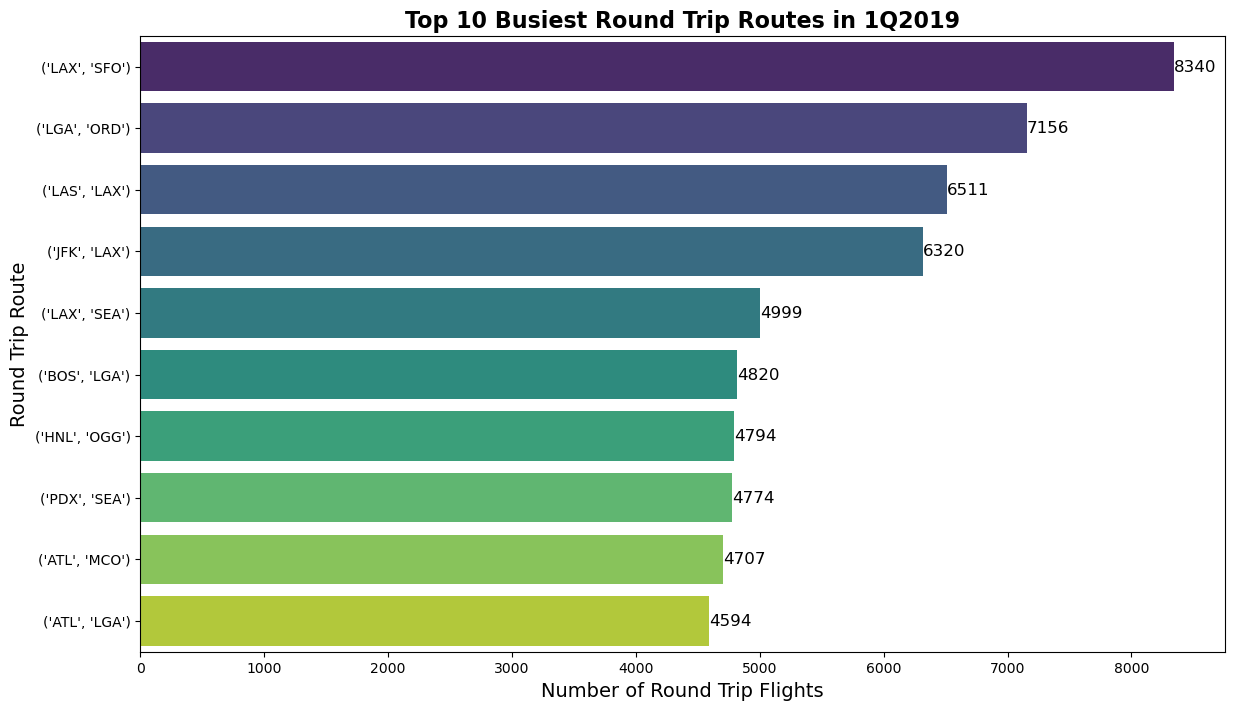

In [117]:
# Plot the 10 busiest round trip routes with data labels
plt.figure(figsize=(14, 8))
sns.barplot(x='round_trip_flights', y='round_trip_key', data=busiest_routes, palette='viridis')
plt.title('Top 10 Busiest Round Trip Routes in 1Q2019', fontsize=16, fontweight='bold')
plt.xlabel('Number of Round Trip Flights', fontsize=14)
plt.ylabel('Round Trip Route', fontsize=14)

# Add data labels
for index, value in enumerate(busiest_routes['round_trip_flights']):
    plt.text(value, index, str(value), color='black', ha="left", va="center", fontsize=12)

plt.show()

The chart showing the top 10 busiest round trip routes in Q1 2019 highlights that the route between Los Angeles (LAX) and San Francisco (SFO) is the busiest, with a total of 8,340 round trip flights. Other frequently traveled routes include LaGuardia (LGA) to Chicago O'Hare (ORD), Las Vegas (LAS) to Los Angeles (LAX), and New York JFK (JFK) to Los Angeles (LAX), each having over 6,000 round trip flights. Routes like Los Angeles to Seattle (SEA), Boston (BOS) to LaGuardia (LGA), and Honolulu (HNL) to Kahului (OGG) also feature prominently, with over 4,700 flights each. This data highlights the significance of these routes for airlines, given their high passenger volume, which demands effective management and resource allocation to sustain service quality and operational efficiency.

2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in
the quarter. Along with the profit, show total revenue, total cost, summary values of
other key components and total round trip flights in the quarter for the top 10 most
profitable routes. Exclude canceled flights from these calculations..

In [118]:
# Identify the top 10 most profitable round trip routes
most_profitable_routes = grouped.nlargest(10, 'profit')

print("\nTop 10 Most Profitable Round Trip Routes:")
print(most_profitable_routes)



Top 10 Most Profitable Round Trip Routes:
     round_trip_key  avg_dep_delay  avg_arr_delay  avg_occupancy_rate  \
728      (CHA, DTW)      -1.210630      -7.417323            0.650079   
1563     (EYW, ORD)       0.337674      -0.408854            0.652431   
1720     (GUM, HNL)       0.799435      -5.629944            0.622203   
1960     (JAC, JFK)      -0.096154     -16.307692            0.721154   
44       (ADK, ANC)      -9.565217     -24.467391            0.640435   
971      (CVG, JFK)       0.822387      -2.257062            0.656243   
1909     (IAH, STT)      -3.000000       7.000000            0.900000   
1801     (HSV, IAD)      -1.083056       0.244186            0.642027   
163      (ATL, HSV)      -1.550336      -4.559564            0.643977   
2390     (MQT, MSP)      -3.969880     -10.022590            0.656265   

      avg_itin_fare     ORIGIN_TYPE DESTINATION_TYPE  total_air_time  \
728     1558.000000   large_airport    large_airport      167.165354   
1563    1

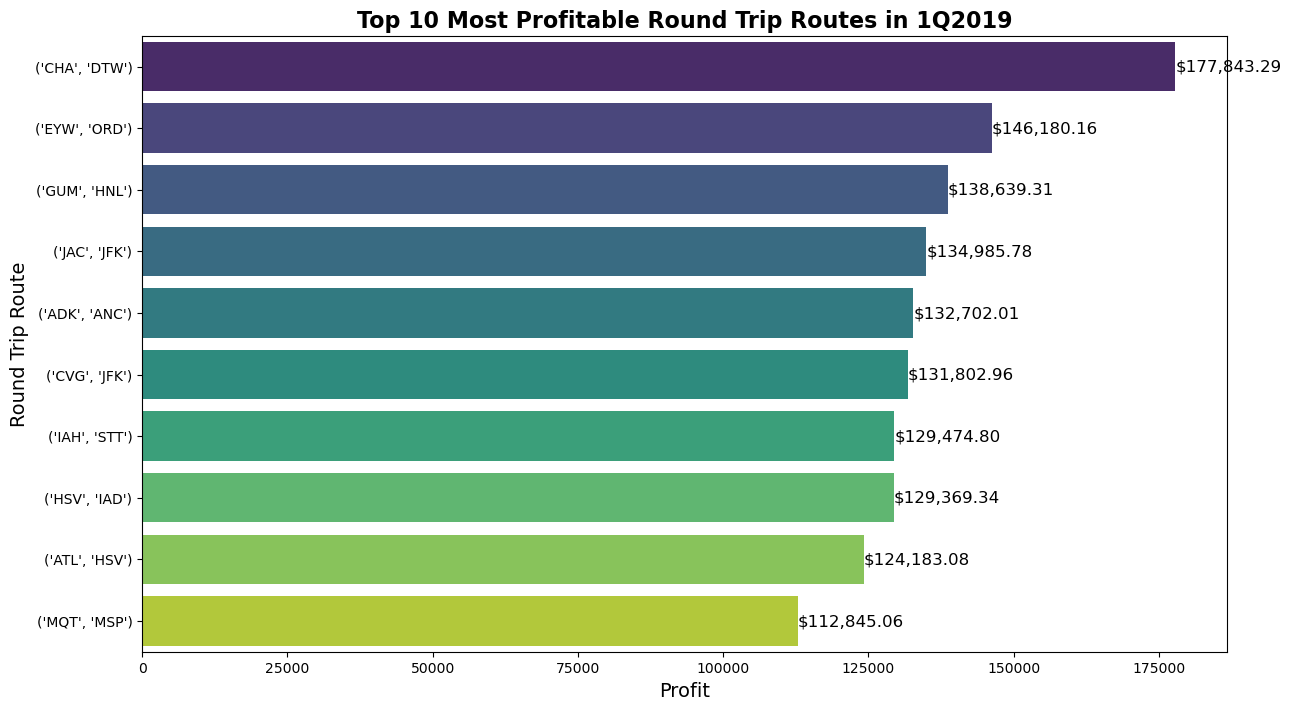

In [119]:
# Plotting the 10 most profitable round trip routes with data labels
plt.figure(figsize=(14, 8))
sns.barplot(x='profit', y='round_trip_key', data=most_profitable_routes, palette='viridis')
plt.title('Top 10 Most Profitable Round Trip Routes in 1Q2019', fontsize=16, fontweight='bold')
plt.xlabel('Profit', fontsize=14)
plt.ylabel('Round Trip Route', fontsize=14)

# Adding data labels
for index, value in enumerate(most_profitable_routes['profit']):
    plt.text(value, index, f'${value:,.2f}', color='black', ha="left", va="center", fontsize=12)

plt.show()

The chart of the top 10 most profitable round trip routes in Q1 2019 reveals that the route between CHA and Detroit (DTW) is the most profitable. Other highly profitable routes include Key West (EYW) to Chicago O'Hare (ORD), Guam (GUM) to Honolulu (HNL), and Jackson Hole (JAC) to New York JFK (JFK), all generating substantial profits. With the lowest profit in the top 10 still being a notable $112,845.06 for the route between Marquette (MQT) and Minneapolis (MSP), this data suggests that airlines should consider optimizing these profitable routes to maximize revenue. 

3. The 5 round trip routes that you recommend to invest in based on any factors that you
choose.

I considered three key factors for selecting the top 5 recommended round trip routes to invest in: profitability, occupancy rate, and flight frequency. I merged the round trip counts with the aggregated data to include the frequency of flights. Then, I ranked the routes based on each of these factors and calculated a composite score by assigning specific weights to each factor. The routes with the best composite scores were selected for investment recommendations.

In [129]:
# Merging round trip counts with the aggregated data
grouped_with_counts = grouped.merge(round_trip_counts, on='round_trip_key')


# Rank and score the routes based on profit, occupancy rate, and round trip flight count
grouped_with_counts['profit_rank'] = grouped_with_counts['profit'].rank(ascending=False)
grouped_with_counts['occupancy_rank'] = grouped_with_counts['avg_occupancy_rate'].rank(ascending=False)
grouped_with_counts['frequency_rank'] = grouped_with_counts['round_trip_flights'].rank(ascending=False)

# Combining the ranks with weights to get a composite score
grouped_with_counts['composite_score'] = (grouped_with_counts['profit_rank'] * 0.4 + grouped_with_counts['occupancy_rank'] * 0.3 +
                                          grouped_with_counts['frequency_rank'] * 0.3)

# Selecting the top 5 routes based on the composite score
top_5_routes = grouped_with_counts.nsmallest(5, 'composite_score')

print("\nTop 5 Recommended Round Trip Routes to Invest In:")
print(top_5_routes[['round_trip_key', 'profit', 'avg_occupancy_rate', 'round_trip_flights', 'composite_score']])



Top 5 Recommended Round Trip Routes to Invest In:
    round_trip_key        profit  avg_occupancy_rate  round_trip_flights  \
818     (CLT, DCA)  50362.299099            0.662169                1535   
223     (ATL, SAV)  75184.378726            0.656489                1538   
869     (CLT, PBI)  72162.141996            0.660010                1012   
881     (CLT, RIC)  66067.392399            0.655371                1523   
210     (ATL, PNS)  52259.540178            0.659448                1251   

     composite_score  
818           322.20  
223           327.70  
869           351.95  
881           375.50  
210           392.60  


4. The number of round trip flights it will take to breakeven on the upfront airplane cost for
each of the 5 round trip routes that you recommend. Print key summary components for
these routes.

In [130]:
# Define the upfront cost for each airplane
upfront_cost = 90_000_000

# Calculate the number of round trip flights to breakeven
top_5_routes['breakeven_flights'] = upfront_cost / top_5_routes['profit']

# Display the breakeven analysis for the top 5 routes
print("\nBreakeven Analysis for Recommended Routes:")
print(top_5_routes[['round_trip_key', 'profit', 'avg_occupancy_rate', 'round_trip_flights', 'breakeven_flights']])


Breakeven Analysis for Recommended Routes:
    round_trip_key        profit  avg_occupancy_rate  round_trip_flights  \
818     (CLT, DCA)  50362.299099            0.662169                1535   
223     (ATL, SAV)  75184.378726            0.656489                1538   
869     (CLT, PBI)  72162.141996            0.660010                1012   
881     (CLT, RIC)  66067.392399            0.655371                1523   
210     (ATL, PNS)  52259.540178            0.659448                1251   

     breakeven_flights  
818        1787.051060  
223        1197.057175  
869        1247.191360  
881        1362.245379  
210        1722.173592  


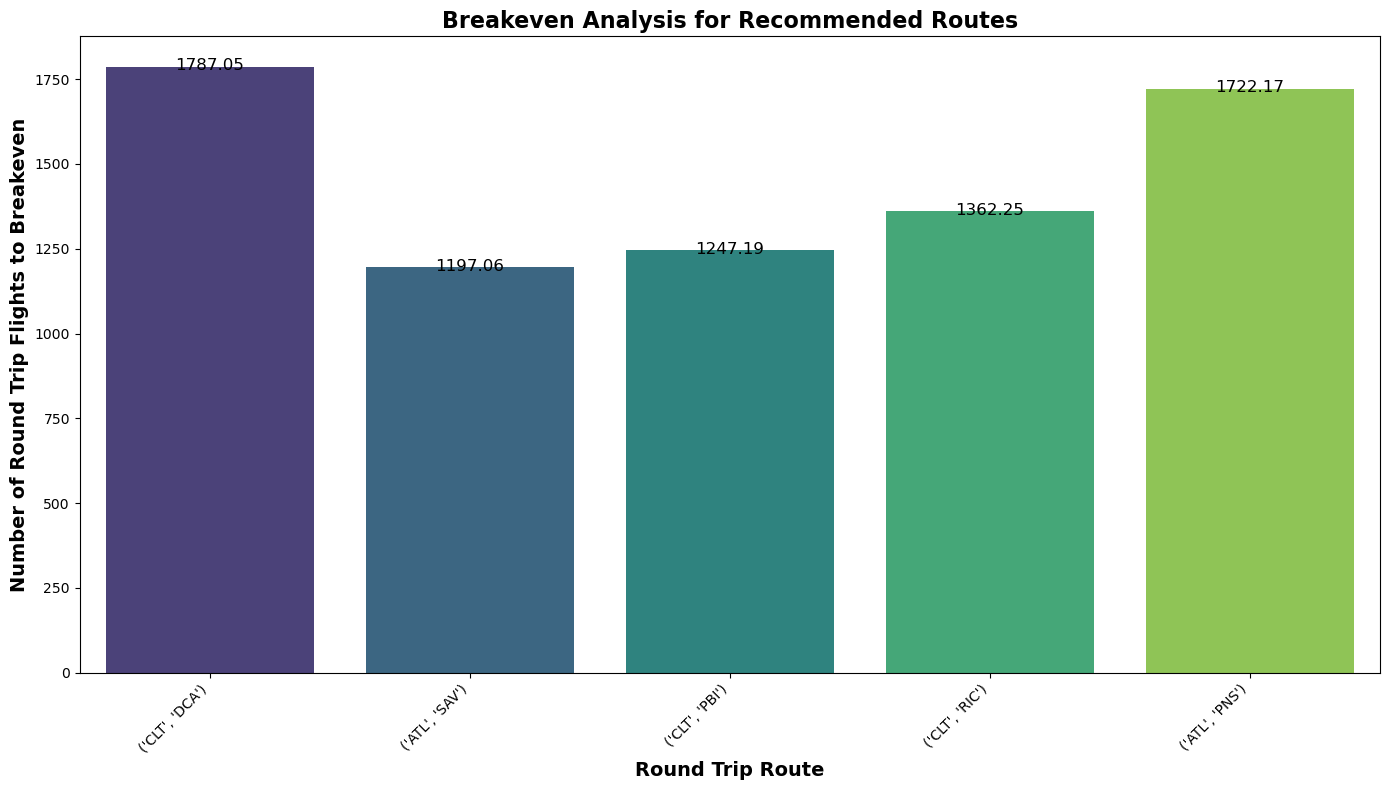

In [131]:
# Correct the visualization code with updated labels and checking column names
plt.figure(figsize=(14, 8))
sns.barplot(data=top_5_routes, x='round_trip_key', y='breakeven_flights', palette='viridis')
plt.title('Breakeven Analysis for Recommended Routes', fontsize=16, fontweight='bold')
plt.xlabel('Round Trip Route', fontsize=14, fontweight='bold')
plt.ylabel('Number of Round Trip Flights to Breakeven', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for i, value in enumerate(top_5_routes['breakeven_flights']):
    plt.text(i, value + 2, f'{value:.2f}', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()


The breakeven analysis for the recommended routes indicates that the route between CLT and DCA requires the highest number of round trip flights (1787.05) to breakeven, while the route between ATL and SAV requires the fewest (1197.06). This suggests that routes with higher profits allow for quicker recouping of upfront airplane costs.

5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to
measure the success of the round trip routes that you recommend.

1. Profitability
2. Occupancy Rates
3. On-time Departure Rate, On-time Arrival Rate.
4. Customer Satisfaction
5. Revenue
6. Cost 
7. Market Share

Some Additional Insights

Ananlysis 1: Calculating the number of flights and average delays per day of the week

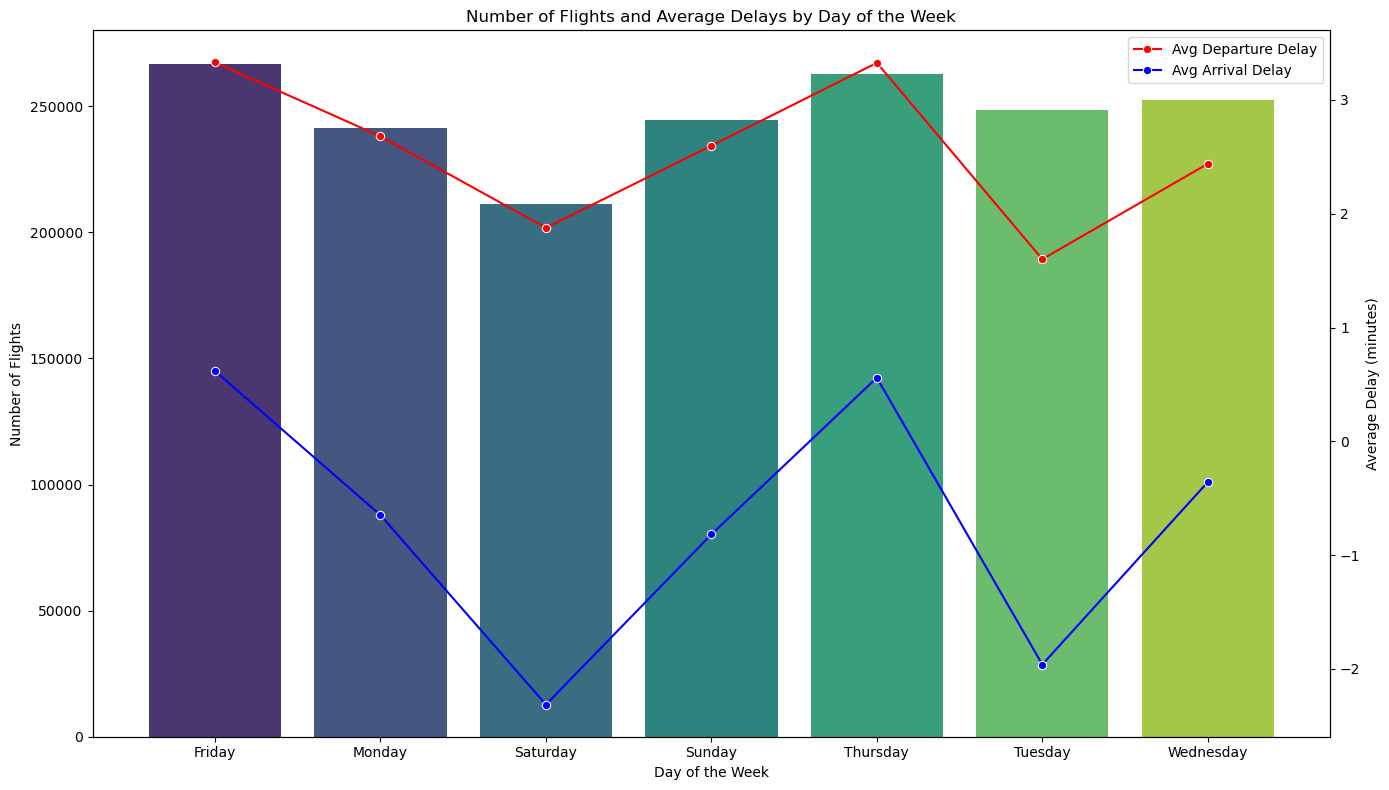

In [135]:
# Calculating the number of flights and average delays per day of the week
weekday_analysis = merged_data.groupby('Weekday').agg({
    'FL_DATE': 'count',
    'DEP_DELAY': 'mean',
    'ARR_DELAY': 'mean'
}).reset_index().rename(columns={'FL_DATE': 'number_of_flights', 'DEP_DELAY': 'avg_dep_delay', 'ARR_DELAY': 'avg_arr_delay'})

# Visualizing the weekday analysis
fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(data=weekday_analysis, x='Weekday', y='number_of_flights', ax=ax1, palette='viridis')
ax1.set_title('Number of Flights and Average Delays by Day of the Week')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Number of Flights')

ax2 = ax1.twinx()
sns.lineplot(data=weekday_analysis, x='Weekday', y='avg_dep_delay', ax=ax2, color='red', marker='o', label='Avg Departure Delay')
sns.lineplot(data=weekday_analysis, x='Weekday', y='avg_arr_delay', ax=ax2, color='blue', marker='o', label='Avg Arrival Delay')
ax2.set_ylabel('Average Delay (minutes)')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


Insight:

Based on the visualization of the number of flights and average delays by day of the week:

The number of flights peaks on Friday, making it the busiest travel day of the week. This aligns with the common trend of people traveling for the weekend.

Flights on Saturday experience the least average departure and arrival delays, suggesting it's a more punctual day for air travel. This might be due to fewer flights and less congestion at airports.

Tuesday Shows the Least Departure Delays, although it's not the day with the least arrival delays. This could indicate better operational efficiencies or lower demand at the start of the week.

Monday and Wednesday Have Moderate Flight Numbers but Varying Delay, both days see a moderate number of flights. However, while Monday has lower average delays, Wednesday experiences higher average departure delays. This difference might be due to mid-week operational challenges or variations in flight scheduling.

Sunday and Thursday Have Higher Delays Despite a High Number of Flights, both days are busy with a high number of flights and also show relatively higher delays. This suggests that increased flight volume on these days leads to more congestion and delays.

Interestingly, the average arrival delays are generally lower than departure delays across all days. This indicates that some delays are being recovered during the flight or through efficient turnaround times at destination airports.

Analysis 2: Impact of Flight Distance on Financial Performance

To analyze the impact of flight distance on ticket fares and profits, I categorized the routes into three distance categories: Short-Haul, Medium-Haul, and Long-Haul. Based on the distribution of total distances in the dataset, I adjusted the thresholds for these categories to better reflect the data. The new thresholds are:

Short-Haul: Total distances up to 1000 miles.
Medium-Haul: Total distances between 1000 and 2500 miles.
Long-Haul: Total distances above 2500 miles.
Using these categories, I aggregated the data to calculate the average ticket fare and profit for each distance category. This allowed me to visualize and compare the performance of different route lengths.

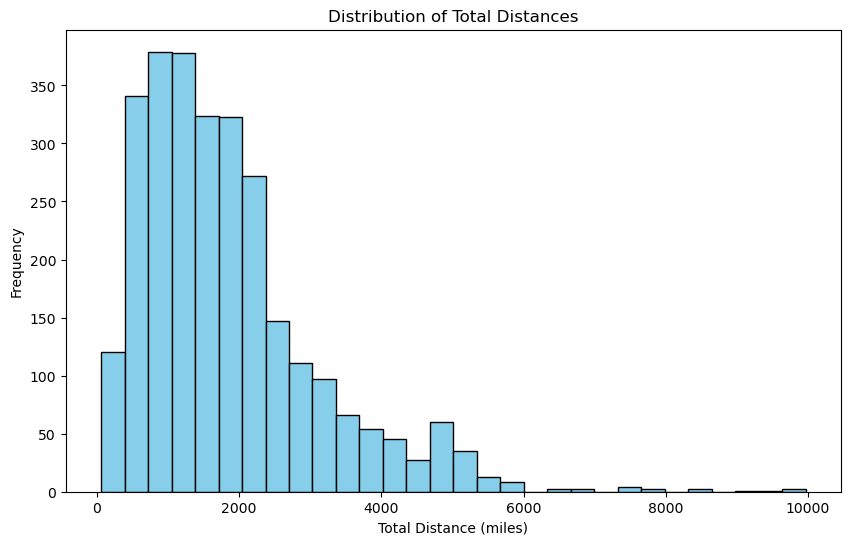

In [143]:
# Plotting the distribution of distances
plt.figure(figsize=(10, 6))
plt.hist(grouped['total_distance'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Distances')
plt.xlabel('Total Distance (miles)')
plt.ylabel('Frequency')
plt.show()


  distance_category  avg_itin_fare        profit
0        Short-Haul     389.150811  31369.316394
1       Medium-Haul     387.875448  21508.142782
2         Long-Haul     489.490822  15416.997288


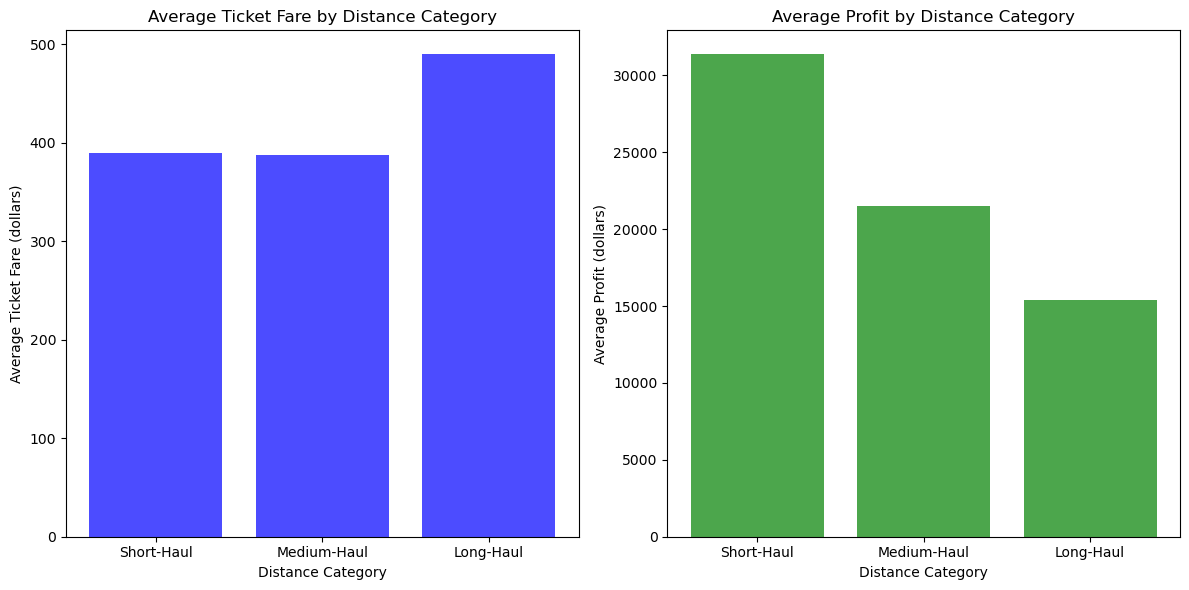

In [148]:
# Define thresholds for distance categories
short_haul_threshold = 1000
medium_haul_threshold = 2500

# Categorize routes by distance
grouped['distance_category'] = pd.cut(grouped['total_distance'], bins=[0, short_haul_threshold, medium_haul_threshold, float('inf')],
                                      labels=['Short-Haul', 'Medium-Haul', 'Long-Haul'])

# Aggregate data by distance category
distance_performance = grouped.groupby('distance_category').agg({
    'avg_itin_fare': 'mean',
    'profit': 'mean'
}).reset_index()

# Displaying the aggregated performance metrics
print(distance_performance)


plt.figure(figsize=(12, 6))

# Plotting average ticket fare by distance category
plt.subplot(1, 2, 1)
plt.bar(distance_performance['distance_category'], distance_performance['avg_itin_fare'], color='blue', alpha=0.7)
plt.title('Average Ticket Fare by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Average Ticket Fare (dollars)')

# Plotting average profit by distance category
plt.subplot(1, 2, 2)
plt.bar(distance_performance['distance_category'], distance_performance['profit'], color='green', alpha=0.7)
plt.title('Average Profit by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Average Profit (dollars)')

plt.tight_layout()
plt.show()


Insight:

From this analysis, it is evident that short-haul routes, despite having lower ticket fares, generate the highest profits. This could be due to lower operational costs and higher flight frequencies. On the other hand, long-haul routes, despite having higher ticket fares, generate lower profits due to increased operational expenses. Medium-haul routes fall in between, with moderate ticket fares and profitability. This insight can help in strategizing route planning and optimizing operations to maximize profitability.

Analysis 3: Detailed Analysis of Performance Based on Profitability and Occupancy Rates

To dive deeper into how profitability and occupancy rates influence flight performance, I conducted a thorough analysis focusing on these aspects. The aim was to uncover insights into how these factors impact average departure delays and average itinerary fares.

I categorized routes based on their profitability into three distinct categories:
Low Profit
Medium Profit
High Profit

Similarly, I categorized routes based on occupancy rates into three groups:
Low Occupancy
Medium Occupancy
High Occupancy

For each combination of profitability and occupancy rate categories, I calculated the average departure delay and average itinerary fare.

  profit_category occupancy_category  avg_dep_delay  avg_arr_delay  \
0      Low Profit      Low Occupancy       2.766778      -0.751478   
1      Low Profit   Medium Occupancy       3.346553      -1.464468   
2      Low Profit     High Occupancy       4.124499       0.681888   
3   Medium Profit      Low Occupancy       2.053970      -1.382705   
4   Medium Profit   Medium Occupancy       2.522719      -0.983665   
5   Medium Profit     High Occupancy       3.057768      -0.294072   
6     High Profit      Low Occupancy       2.192200      -0.299562   
7     High Profit   Medium Occupancy       1.242070      -1.063695   
8     High Profit     High Occupancy       1.283310      -1.612896   

   avg_itin_fare        profit  
0     255.227940  -2108.997048  
1     292.922237    688.820124  
2     243.203932  -1353.183930  
3     401.588403  20452.518547  
4     392.206160  21123.093957  
5     385.073727  20560.219772  
6     626.854129  52666.627443  
7     582.246273  50556.693133  
8 

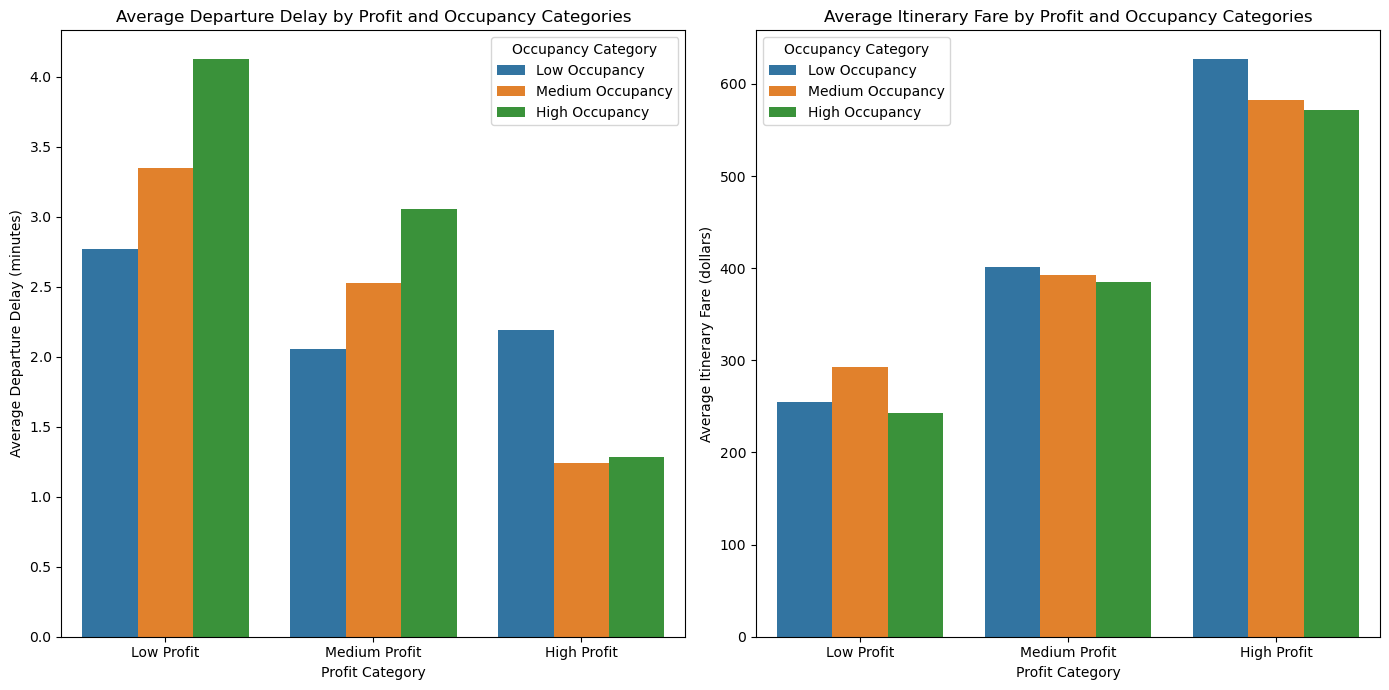

In [154]:
# Defining thresholds for profitability and occupancy rate categories
high_profit_threshold = grouped['profit'].quantile(0.75)
low_profit_threshold = grouped['profit'].quantile(0.25)
high_occupancy_threshold = grouped['avg_occupancy_rate'].quantile(0.75)
low_occupancy_threshold = grouped['avg_occupancy_rate'].quantile(0.25)

# Categorizing routes by profitability and occupancy rate
grouped['profit_category'] = pd.cut(grouped['profit'], 
                                    bins=[-float('inf'), low_profit_threshold, high_profit_threshold, float('inf')],
                                    labels=['Low Profit', 'Medium Profit', 'High Profit'])

grouped['occupancy_category'] = pd.cut(grouped['avg_occupancy_rate'], 
                                       bins=[0, low_occupancy_threshold, high_occupancy_threshold, float('inf')],
                                       labels=['Low Occupancy', 'Medium Occupancy', 'High Occupancy'])

# Aggregating data by profit and occupancy rate categories
category_performance = grouped.groupby(['profit_category', 'occupancy_category']).agg({
    'avg_dep_delay': 'mean',
    'avg_arr_delay': 'mean',
    'avg_itin_fare': 'mean',
    'profit': 'mean'
}).reset_index()

print(category_performance)


plt.figure(figsize=(14, 7))

# Plotting average delays by profit and occupancy rate categories
plt.subplot(1, 2, 1)
sns.barplot(x='profit_category', y='avg_dep_delay', hue='occupancy_category', data=category_performance)
plt.title('Average Departure Delay by Profit and Occupancy Categories')
plt.xlabel('Profit Category')
plt.ylabel('Average Departure Delay (minutes)')
plt.legend(title='Occupancy Category')

# Plotting average itinerary fare by profit and occupancy rate categories
plt.subplot(1, 2, 2)
sns.barplot(x='profit_category', y='avg_itin_fare', hue='occupancy_category', data=category_performance)
plt.title('Average Itinerary Fare by Profit and Occupancy Categories')
plt.xlabel('Profit Category')
plt.ylabel('Average Itinerary Fare (dollars)')
plt.legend(title='Occupancy Category')

plt.tight_layout()
plt.show()


Insights:

Average Departure Delays:

Low Profit and High Occupancy: Routes that are highly occupied but generate low profit tend to experience the highest average departure delays. This suggests that simply having more passengers doesn't guarantee smooth operations.
High Profit Routes: Routes in the high-profit category generally exhibit lower average departure delays, indicating that these routes are better managed, with more efficient resource allocation and operational strategies.

Average Itinerary Fare:

High Profit Routes: These routes command higher average fares, reflecting their high demand or premium nature. This makes sense because routes that generate more profit can afford to charge more for tickets.
Medium Occupancy in High Profit: Routes that fall into the medium occupancy and high-profit category also show relatively high fares. This suggests that profitability is closely linked with the ability to command higher ticket prices.

Impact of Occupancy Rates:

High Occupancy and Delays: Routes with high occupancy rates can lead to increased departure delays, likely due to the challenges of managing a larger number of passengers. However, high-profit routes are better at mitigating these delays, indicating effective handling of high passenger volumes.

In conclusion, Routes that generate higher profits manage delays more effectively and have the ability to charge higher fares. While high occupancy can cause delays, high-profit routes handle these challenges more efficiently, demonstrating better management and resource utilization.



Additional Analysis and Ideas:

Here are a few more analyses that could further enhance the insights and recommendations:

Competitor Analysis: By study data on competitors' pricing, frequencies, delays, occupancy rates, and profitability. This will provide us with strategic insights that could lead to pricing adjustments, optimized routes, and improved service offerings, ultimately helping us outperform our competitors.

Monthly Analysis: Aggregating the data on a monthly basis will help us analyze trends in occupancy rates, delays, ticket fares, and profitability throughout the year. This analysis will help us identify peak and off-peak months, enabling us to implement dynamic pricing strategies and allocate resources more effectively during different times of the year.

Prediction and Forecasting: Using machine learning models like ARIMA or Prophet, we can predict occupancy rates, delays, and profitability based on historical data. These forecasts will provide a glimpse into future trends, allowing us to plan better, allocate resources more efficiently, and make strategic decisions that optimize our operations.

Route Expansion Analysis: By using clustering and market analysis, we can find high-demand areas that we currently don't cover. Analyzing existing data will help us uncover opportunities for expansion. We can then recommend new routes that align with demand patterns and have a high potential for profitability, helping us expand our market presence effectively

Conclusion:

The analysis of airline routes in Q1 2019 highlights several key areas for optimizing operations and profitability. The busiest routes, like Los Angeles to San Francisco, demand efficient management to handle high passenger volumes effectively. Profitable routes, such as CHA to Detroit and Key West to Chicago, present lucrative opportunities that airlines should focus on optimizing further. Recommended routes for investment strike a balance between profitability, occupancy rates, and flight frequency, ensuring strategic use of resources. The breakeven analysis provides a clear path to offsetting upfront costs, making these routes even more appealing. To maintain success, it is crucial to track key performance indicators like profitability, occupancy rates, on-time performance, customer satisfaction, and market share. 